# Gender Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Loading the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Cleaning the column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
gender = df.groupby('gender').size()
gender

gender
Female    27726
Male      27774
dtype: int64

## 1. Create pie chart to see the Proportion of Total Billing Amount by Gender
The result offers a clear of the distribution of the total billing amount based on gender. With males contributing 50.2% and females accounting for 49.8%, the financial input from each gender group is remarkably balanced. While a slight numerical advantage exists for males, the practical difference is minimal, indicating a relatively equitable distribution of healthcare or service costs between the two groups.

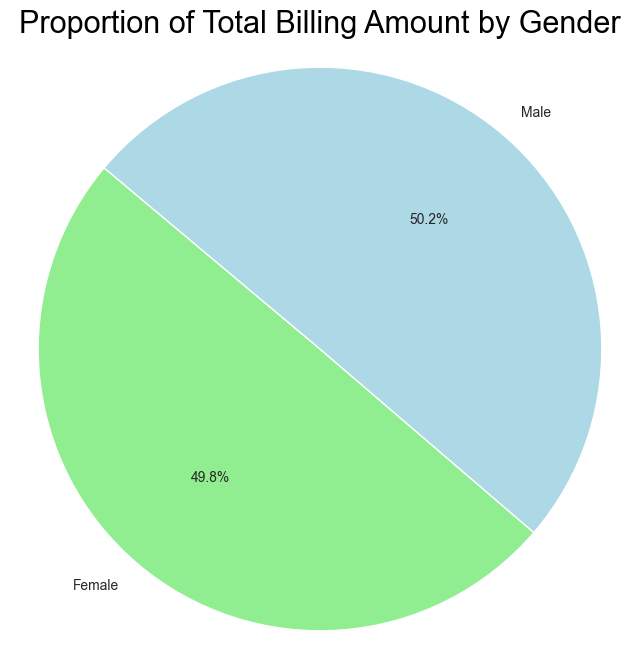


Total Billing Amount by Gender:


gender
Female    7.061993e+08
Male      7.112327e+08
Name: billing_amount, dtype: float64

In [ ]:
# Group by gender and sum the billing amounts
gender_billing = df.groupby('gender')['billing_amount'].sum()

sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))
plt.pie(gender_billing, 
        labels=gender_billing.index, 
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightgreen', 'lightblue'])
plt.title('Proportion of Total Billing Amount by Gender', fontsize=22, color='black')
# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

plt.show()
print("\nTotal Billing Amount by Gender:")
gender_billing

# 2. Annual Billing Amount by Gender (2019-2024)
* <b>Comparison by Gender:</B>
    * In `2019`, the total billing amount for `females ($95.9M)` was slightly higher than that for `males ($94.0M)`.
    * From `2020` to `2023`, the total billing amount for males `consistently exceeded` that of females. The difference appears most significant in 2020 ($146.7M for males vs. $139.9M for females).
    * In `2024`, the trend reverses again, with the total billing amount for `females ($47.4M)` being `slightly lower` than that for `males ($50.4M)`, but both are significantly lower than the preceding years.

<b>Peak Billing:</b> The highest total billing amount for males occurred in 2020 ($146.7M), while for females, it also peaked in `2020 ($139.9M)`.

<b>Significant Drop in 2024:</b> There is a substantial decrease in the total billing amount for both genders in 2024 compared to the previous years, suggesting a significant change in billing patterns or volume during that year.

In [8]:
from matplotlib.ticker import FuncFormatter

df['Date of Admission'] = pd.to_datetime(df['date_of_admission'])
df['Year'] = df['Date of Admission'].dt.year

# Filter years (2019-2024)
df = df[df['Year'].between(2019, 2024)]

# Grouping by gender and year
annual_billing = df.groupby(['gender', 'Year'])['billing_amount'].sum().reset_index()

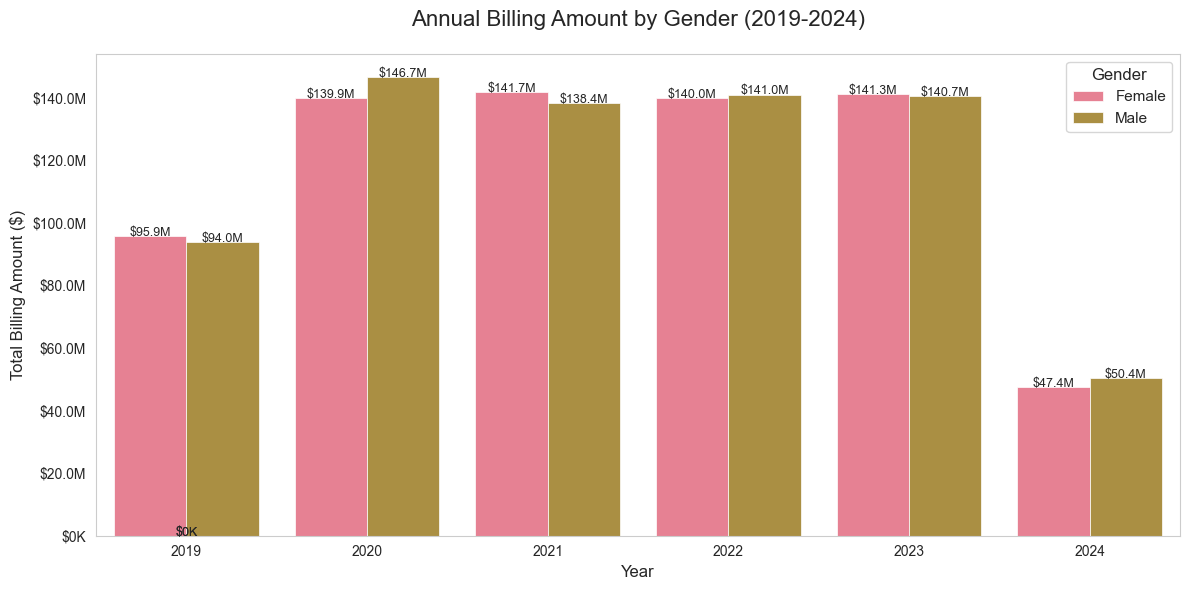


 The Annual Billing Summary by Gender (in millions $):


gender,Female,Male
Year,,
2019,95.9,94.0
2020,139.9,146.7
2021,141.7,138.4
2022,140.0,141.0
2023,141.3,140.7
2024,47.4,50.4


In [12]:
# Plot settings
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

# Creating bar plot
ax = sns.barplot(data=annual_billing, 
                 x='Year', 
                 y='billing_amount', 
                 hue='gender',
                 edgecolor='white',
                 linewidth=0.5)

# Formatting the chart's title and labels
plt.title('Annual Billing Amount by Gender (2019-2024)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Billing Amount ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Formating the y-axis as currency
def currency_formatter(x, pos):
    return f"${x/1000000:,.1f}M" if x >= 1000000 else f"${x/1000:,.0f}K"
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Adjusting the legend
plt.legend(title='Gender', fontsize=11, title_fontsize=12)

# Adding the value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10000,
            f'${height/1000000:.1f}M' if height >= 1000000 else f'${height/1000:,.0f}K',
            ha="center", fontsize=9)

plt.tight_layout()
plt.grid(False)
plt.show()

# Displaying summary table
print("\n The Annual Billing Summary by Gender (in millions $):")
summary_table = annual_billing.pivot_table(index='Year', columns='gender', values='billing_amount')/1000000
summary_table.round(1)

#### Annual Billing Comparison by Gender

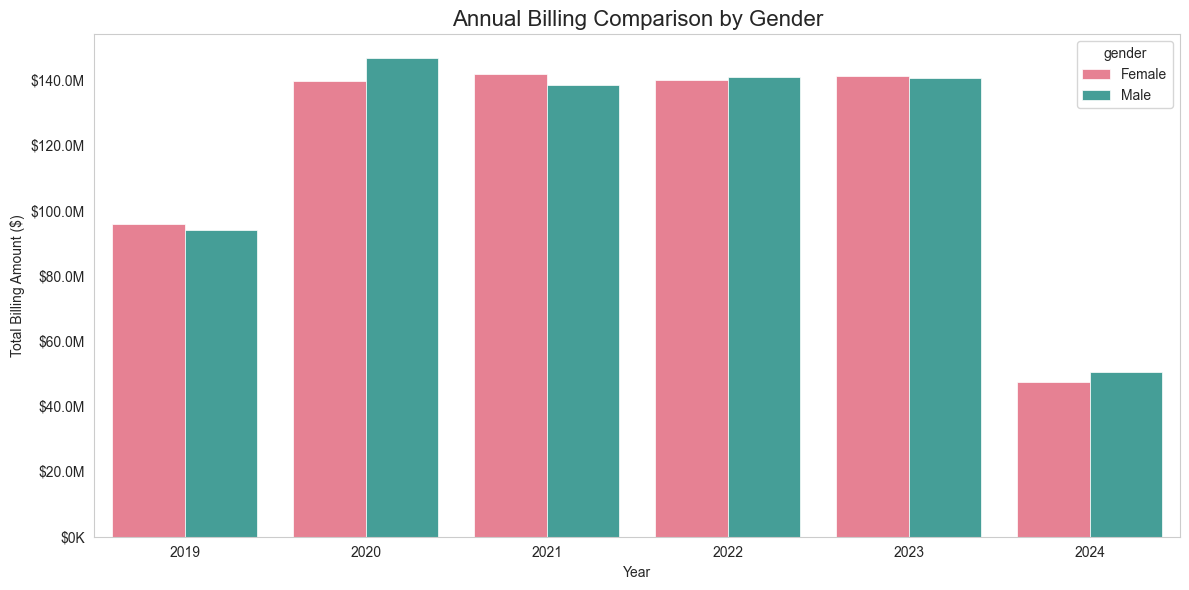

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_billing, x='Year', y='billing_amount', hue='gender', 
            palette='husl', edgecolor='white', linewidth=0.5)
plt.title('Annual Billing Comparison by Gender', fontsize=16)
plt.ylabel('Total Billing Amount ($)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.tight_layout()
plt.grid(False)
plt.show()

## 3. Gender & Insurance Provider
The following analysis focuses on understanding the relationship between `gender` and `insurance providers`. Specifically, we aim to identify which insurance providers are more commonly associated with male or female patients. By examining the distribution of patients across different insurance providers, segmented by gender, we can gain insights into potential trends or patterns in healthcare coverage preferences or accessibility. This analysis will help us better understand the demographic composition of patients under various insurance providers.

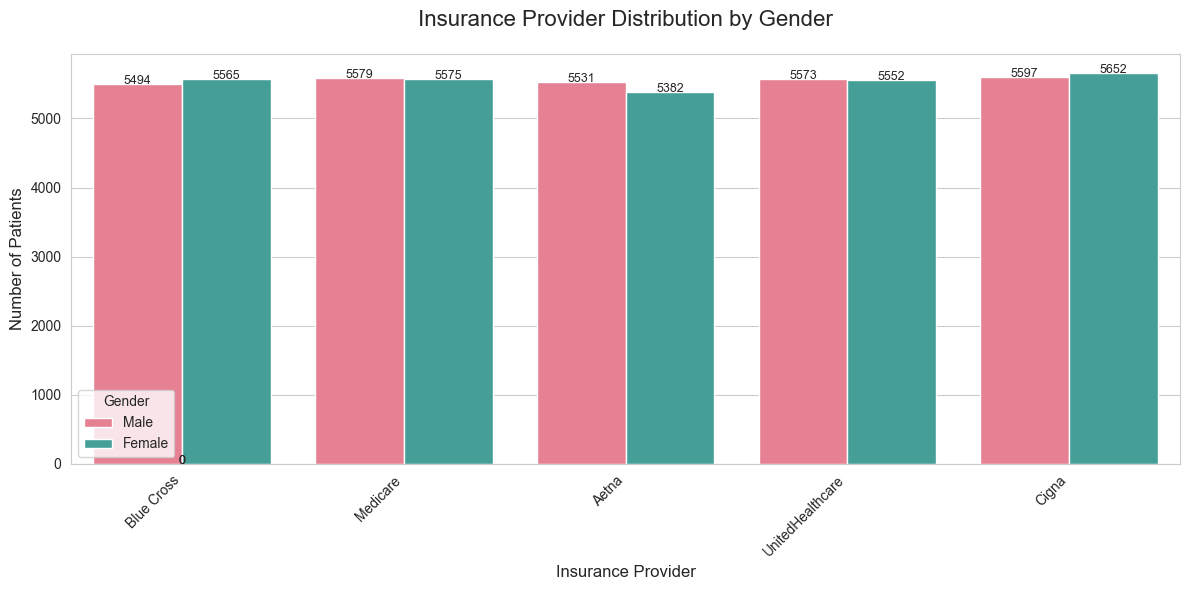

In [ ]:
df['Insurance Provider'] = df['insurance_provider'].str.strip()
#  Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create count plot
ax = sns.countplot(data=df, x='insurance_provider', hue='gender', 
                   palette='husl', edgecolor='white')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}', ha="center", fontsize=9)

plt.title('Insurance Provider Distribution by Gender', fontsize=16, pad=20)
plt.xlabel('Insurance Provider', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## 4. Insurance Provider Trends by Gender (2019-2024)
Here we aim to visualize the trends of `gender` and `insurance providers` over the `years (2019-2024)` using a `line chart`. This chart consolidates all the data into a single visualization, allowing us to observe patterns and fluctuations in the percentage distribution of patients across different insurance providers, segmented by gender. By analyzing this chart, we can identify key trends, such as which insurance providers are more popular among male or female patients and how these preferences have evolved over time. This comprehensive view helps in understanding the dynamics of healthcare coverage preferences and accessibility across genders.

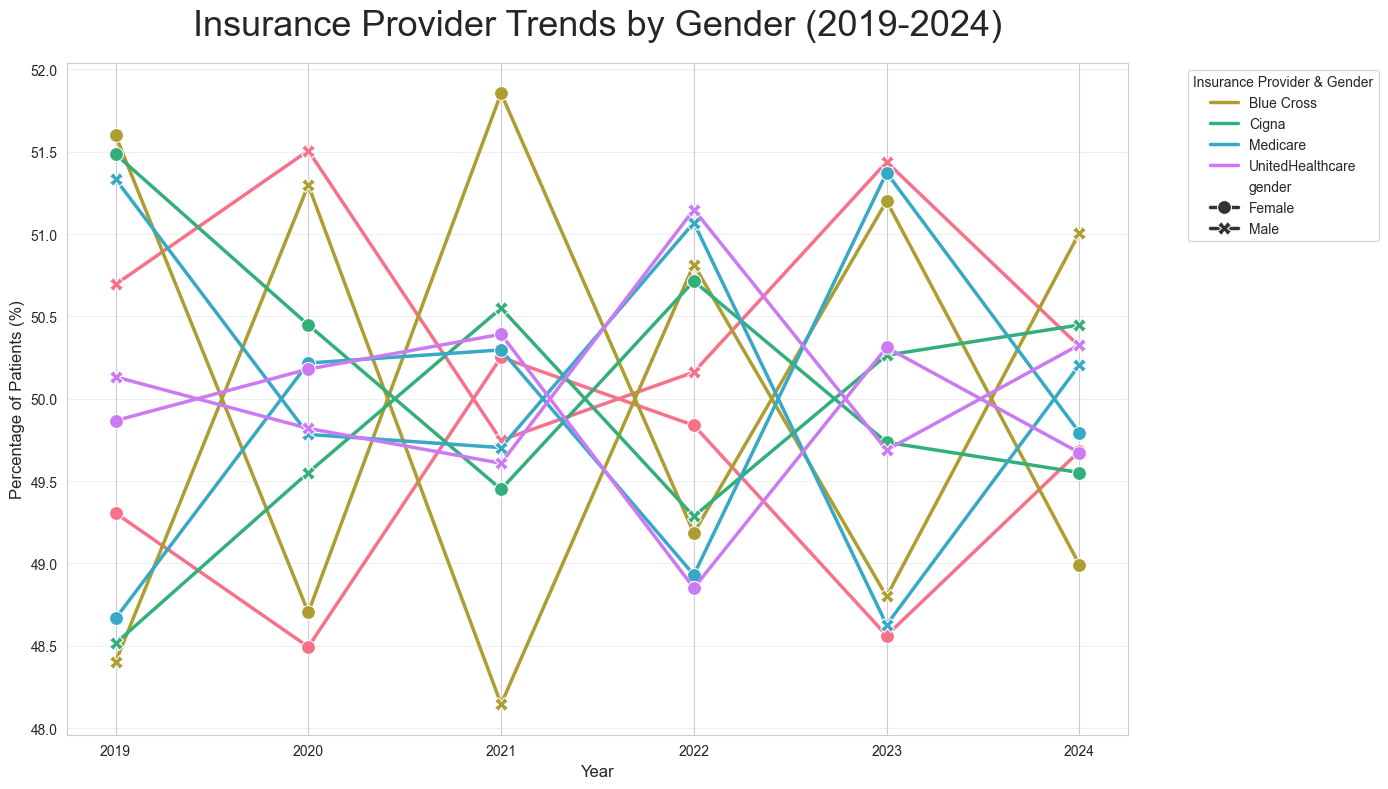

In [ ]:

# Create normalized percentage data
trend_data = (df.groupby(['Year', 'insurance_provider', 'gender'])
              .size()
              .unstack()
              .fillna(0)
              .apply(lambda x: x/x.sum()*100, axis=1)
              .stack()
              .reset_index(name='Percentage'))

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create line plot with markers
ax = sns.lineplot(data=trend_data, 
                  x='Year', 
                  y='Percentage', 
                  hue='insurance_provider', 
                  style='gender',
                  markers=True,
                  dashes=False,
                  linewidth=2.5,
                  palette='husl',
                  markersize=10)

# Formatting
plt.title('Insurance Provider Trends by Gender (2019-2024)', fontsize=26, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.xticks(sorted(df['Year'].unique()), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[2:], labels=labels[2:], 
           title='Insurance Provider & Gender',
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

plt.tight_layout()
plt.show()



### Insurance Provider Market Share by Gender Over Time
In the above visualization, we consolidated all the data into a single chart to observe the overall trends in the market share of `insurance providers by gender`. However, to gain deeper insights and provide a clearer understanding of the data, we split the results by insurance provider and gender in the subsequent visualization. This approach allows us to analyze the market share of each insurance provider individually, segmented by gender, offering a more detailed and granular view of the data.

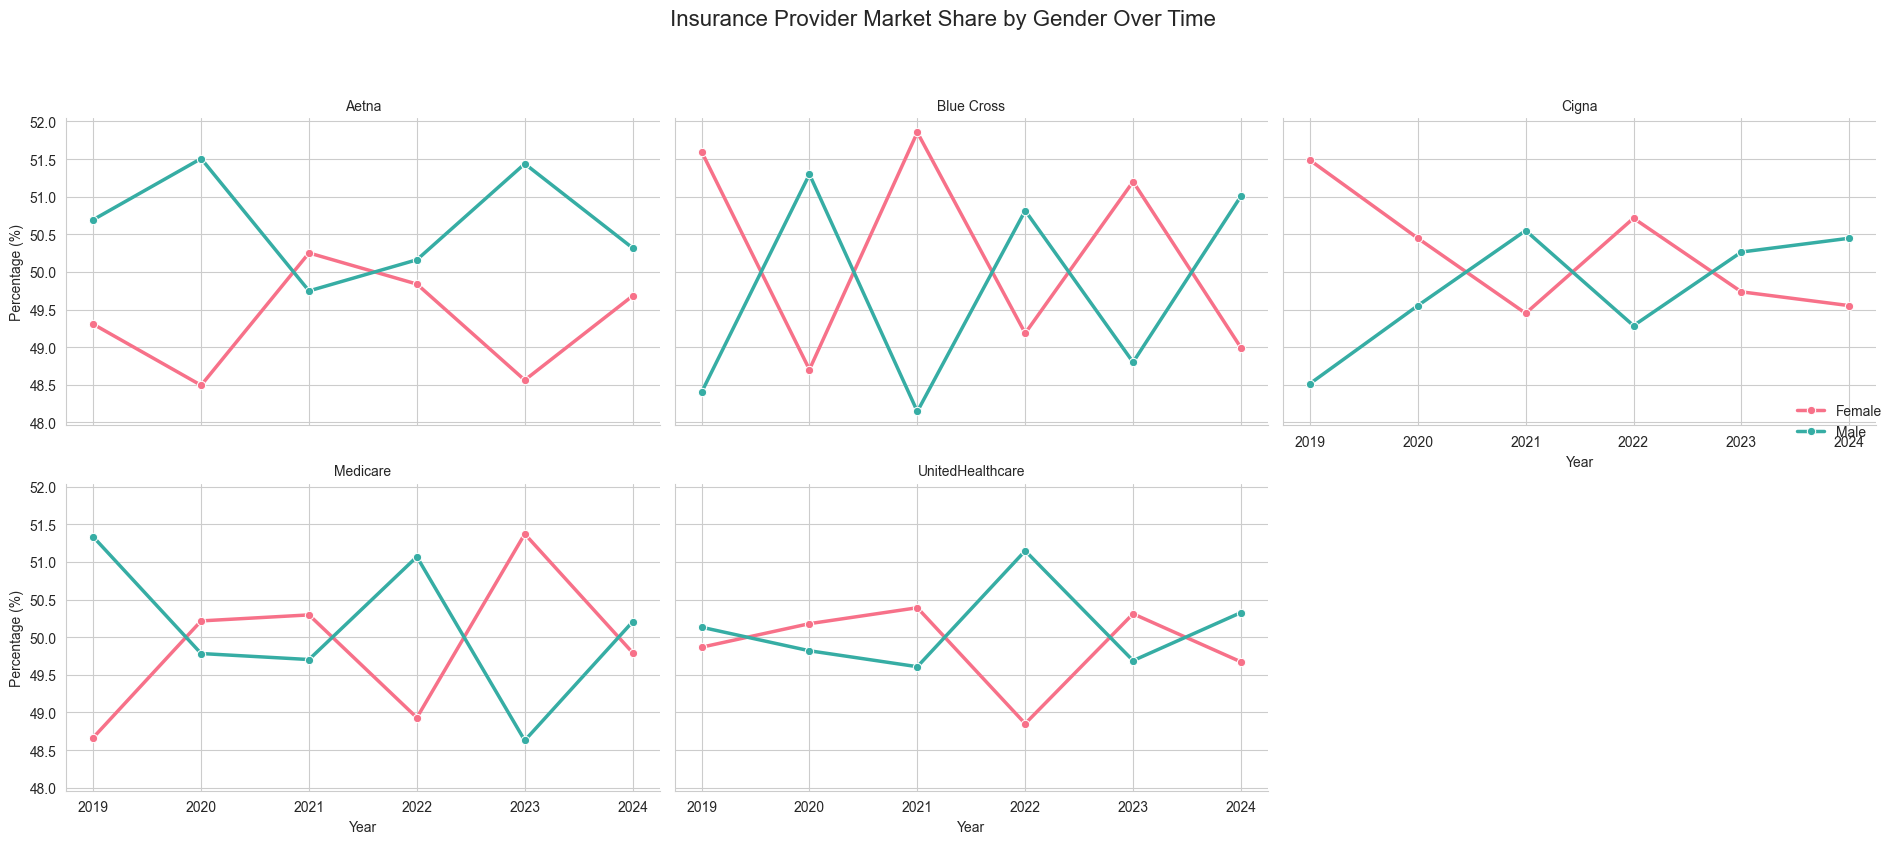

In [ ]:
g = sns.FacetGrid(trend_data, col='insurance_provider', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Percentage', 'gender', 
      palette='husl', linewidth=2.5, marker='o')
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Percentage (%)")
g.fig.suptitle('Insurance Provider Market Share by Gender Over Time', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

## 5. Gender and Medical Condition Analysis
The analysis of `medical conditions` by `gender` reveals significant insights into the distribution of healthcare needs across male and female patients. By examining the data, we can identify prevalent medical conditions for each gender, the associated billing amounts, and the age distribution. This information is crucial for understanding gender-specific healthcare trends and tailoring medical services to meet the unique needs of different patient groups.
In the 

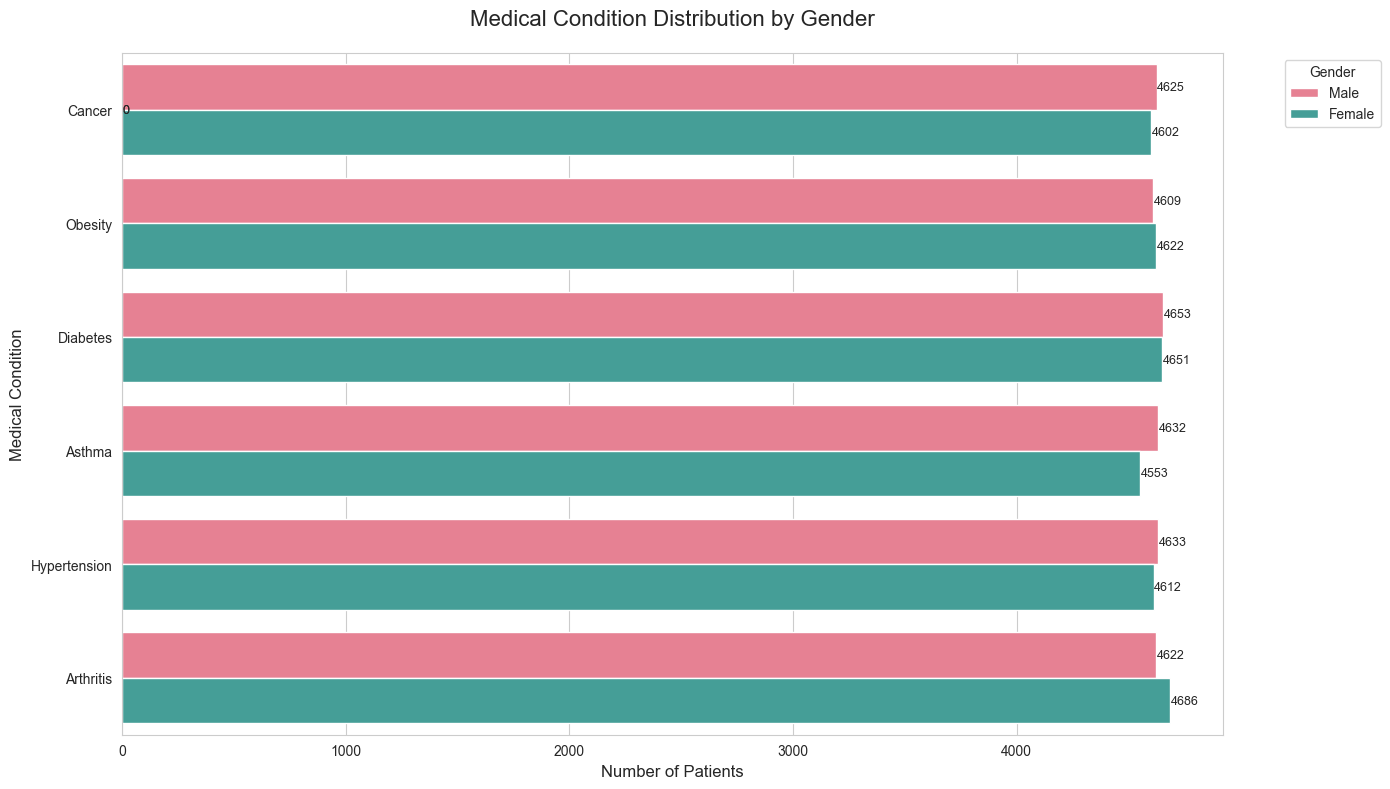

In [13]:
df['Medical Condition'] = df['medical_condition'].str.strip()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create count plot
ax = sns.countplot(data=df, y='medical_condition', hue='gender', 
                   palette='husl', edgecolor='white')


# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + p.get_height()/2.,
            f'{int(width)}', ha="left", va="center", fontsize=9)

plt.title('Medical Condition Distribution by Gender', fontsize=16, pad=20)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 The following code we have the illustration of the "`Billing Amoun`t Distribution by `Medical Condition` and `Gender`" for six different medical conditions: `Arthritis`, `Hypertension`, `Asthma`, `Diabetes`, `Obesity`, and `Cancer`.For each medical condition, there are two box plots side-by-side, representing the distribution of billing amounts for `males (pink)` and `females (teal)`.
* <b>Comparison by Gender within Each Condition:</b>
    * <b>Arthritis:</b> The median billing amount for males appears slightly higher than for females, and the IQR for males also seems a bit wider, suggesting more variability.
    Hypertension: The median billing amounts for males and females are very similar, with comparable IQRs.
    * <b>Asthma:</b> The median billing amount for females appears slightly higher than for males, and the IQR for females might be marginally wider.
    Diabetes: The median billing amounts are quite close, with slightly more variability (wider IQR) for females.
    * <b>Obesity:</b> The median billing amount for females seems slightly higher than for males, and the IQR for females might be a bit wider.
    * <b>Cancer:</b> The billing amounts for both genders are generally higher than for other conditions. The median for males appears slightly higher, and the IQR for males also looks somewhat wider, indicating greater variability in the central billing amounts for males with cancer.

In this visualization we have a direct comparison of billing amount distributions between genders for each specific medical condition. While there are some subtle differences in median billing amounts and variability (as indicated by the IQR) between males and females across the conditions, there isn't a consistent pattern of one gender always having significantly higher or more variable billing amounts. Cancer generally exhibits the highest billing amounts for both genders compared to the other conditions.

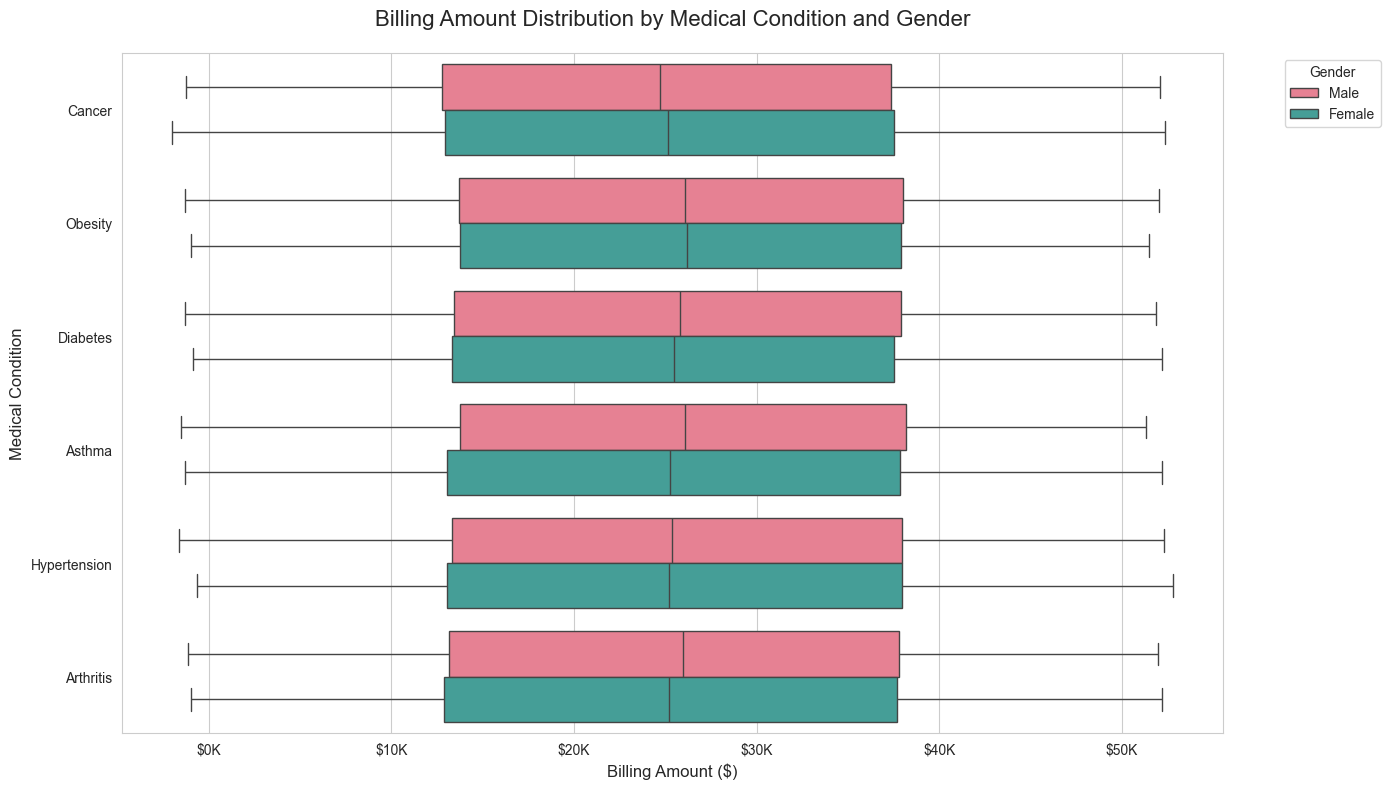

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y='medical_condition', x='billing_amount', hue='gender',
            palette='husl', showfliers=False)

plt.title('Billing Amount Distribution by Medical Condition and Gender', fontsize=16, pad=20)
plt.xlabel('Billing Amount ($)', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)

# Format x-axis as currency
ax = plt.gca()
def currency_formatter(x, pos):
    return f"${x/1000:,.0f}K"
ax.xaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 6. Age Distribution by Medical Condition and Gender
The following code will display a series of horizontally oriented violin plots, illustrating the "`Age` Distribution by `Medical Condition` and `Gender`" for six different medical conditions: `Arthritis`, `Hypertension`, `Asthma`, `Diabetes`, `Obesity`, and `Cancer`. The x-axis represents age, and the y-axis lists the medical conditions. For each medical condition, there are two halves of a violin plot, split along the center: `pink for males` and `teal for females`.

<b>Comparison by Gender within Each Condition:</b>

* <b>Arthritis:</b> Both male and female patients with Arthritis show a distribution skewed towards older ages, with the median age appearing to be in the 60-70 range for both genders. The distribution for females seems slightly wider at older ages.
    Hypertension: Similar to Arthritis, both genders with Hypertension tend to be older, with the median age likely in the 50-70 range. The distributions appear somewhat similar in shape.
* <b>Asthma:</b> The age distribution for Asthma appears more spread out compared to Arthritis and Hypertension, with a noticeable presence of younger individuals for both genders. The median age seems to be in the 40-60 range. The female distribution might be slightly wider overall.
* <b>Diabetes:</b> The age distribution for Diabetes also shows a tendency towards older ages, with the median likely in the 50-70 range. The male distribution seems slightly wider at older ages compared to females.
* <b>Obesity:</b> The age distribution for Obesity appears to be shifted towards slightly younger ages compared to some other chronic conditions, with the median likely in the 40-60 range. The distributions for males and females look relatively similar.
* <b>Cancer:</b> The age distribution for Cancer is notably skewed towards older ages, with the median age appearing to be in the 60s or even higher for both genders. The distribution for males might extend slightly further into older ages.

These violin plots provide a detailed view of the age distribution for males and females across different medical conditions. They highlight that certain conditions, like Arthritis, Hypertension, and Cancer, are more prevalent in older age groups, while others, like Asthma and Obesity, show a wider age range and a tendency towards slightly younger patients. The split violin plot allows for a direct visual comparison of the age distributions between genders for each medical condition, revealing subtle differences in the central tendencies and spread of ages.

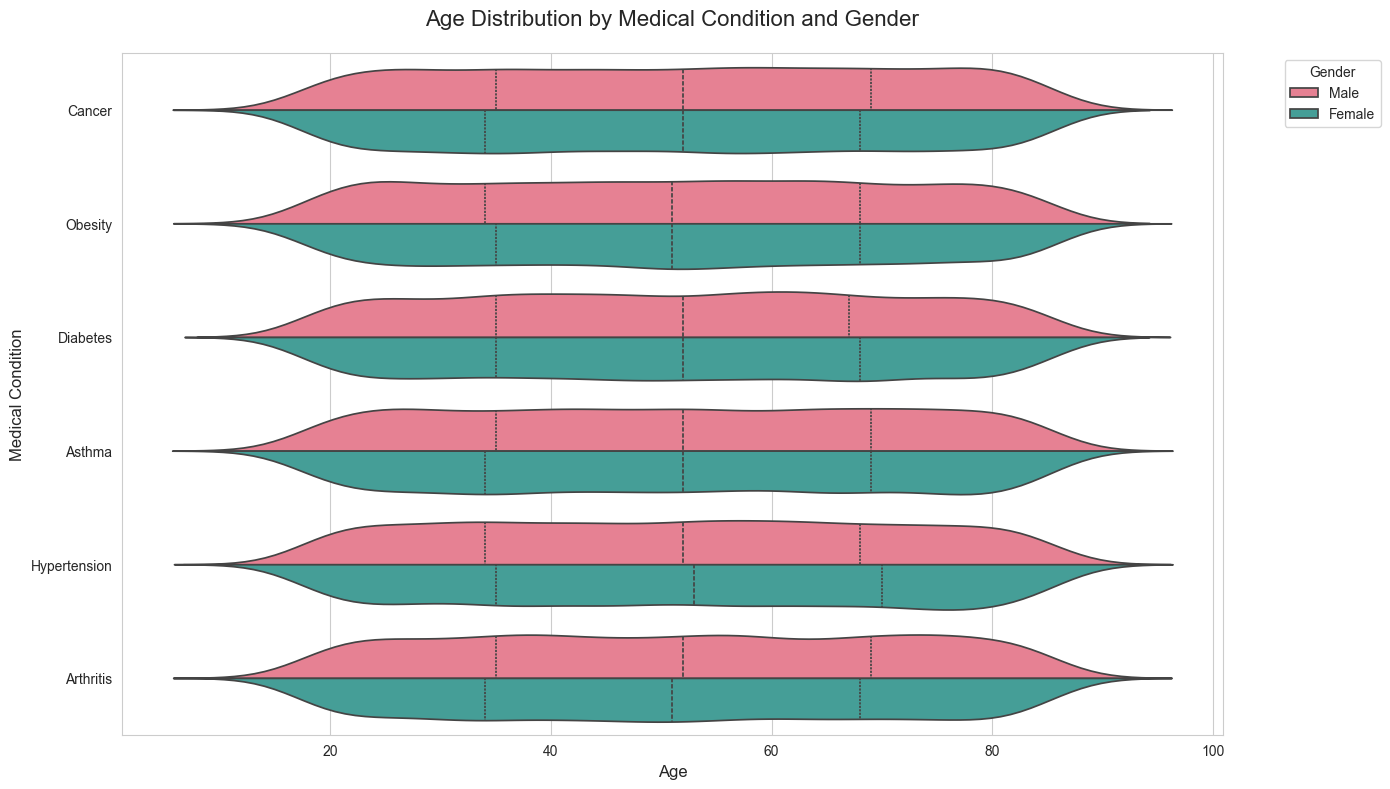

In [15]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, y='medical_condition', x='age', hue='gender',
               palette='husl', split=True, inner="quartile")

plt.title('Age Distribution by Medical Condition and Gender', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Medical Condition Prevalence by Gender
<b>Key Insights from the Bar Chart:</b>
<b>Overall Prevalence:</b> The length of each bar indicates the prevalence of that specific medical condition within the dataset for each gender.

* <b>Arthritis:</b> The number of female patients with `Arthritis (4686)` is `noticeably higher` than the number of `male patients (4622)`.
* <b>Asthma:</b> The number of female patients with `Asthma (4553)` is `slightly lower` than the number of `male patients (4632)`.
* <b>Cancer:</b> The number of female patients with `Cancer (4602)` is `slightly lower` than the number of `male patients (4625)`.
* <b>Diabetes:</b> The number of female patients with `Diabetes (4651)` is `slightly higher` than the number of `male patients (4653)`. The prevalence is very similar for both genders.
* <b>Hypertension:</b> The number of female patients with `Hypertension (4612)` is `lower` than the number of `male patients (4633)`.
* <b>Obesity:</b> The number of female patients with `Obesity (4622)` is `slightly higher` than the number of `male patients (4609)`.

In the following bar chart, we have a clear comparison of the prevalence of different medical conditions between `male` and `female` patients. While the overall prevalence is relatively balanced across genders for most conditions, we notice minor tendencies for certain conditions to be slightly more prevalent in one gender over the other.

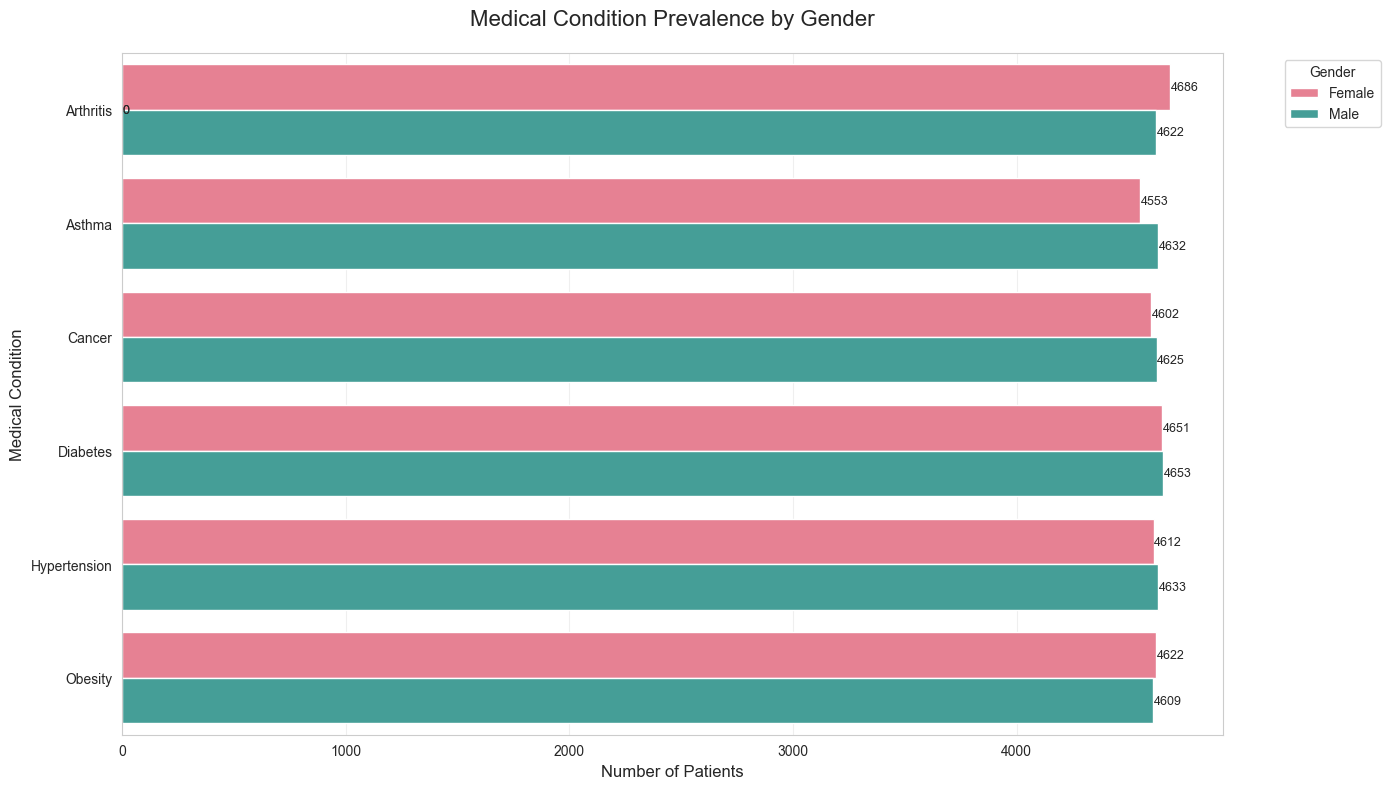

In [16]:

# Create count of patients by condition and gender
condition_counts = df.groupby(['medical_condition', 'gender']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=condition_counts, 
            y='medical_condition', 
            x='Count', 
            hue='gender',
            palette='husl',
            edgecolor='white')

# Add value labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 3, 
             p.get_y() + p.get_height()/2., 
             f'{int(width)}', 
             ha='left', 
             va='center',
             fontsize=9)

plt.title('Medical Condition Prevalence by Gender', fontsize=16, pad=20)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Median Age by Medical Condition and Gender

The chart presents a clear comparison of the median age at which `male` and `female` patients are associated with six different `medical conditions`. The horizontal bar format allows for easy comparison across conditions and `genders`. The consistent scale on the x-axis (Median Age) facilitates direct interpretation of the values.

<b>Key Analytical Points:</b>

1. <b>Central Tendency:</b> The most striking initial observation is the relatively consistent median age across most conditions and genders, clustering around the early to mid-50s. This suggests a general pattern in the age of patients within this dataset for these common medical conditions.

2. <b>Significant Outlier:</b> Arthritis: The standout exception to this trend is Arthritis. The median age for females with Arthritis (61 years) is notably higher – a full nine years – than that of males (52 years). This significant disparity warrants further exploration. Potential questions arise:
    * Is there a biological or physiological reason for this age difference in Arthritis onset or diagnosis between genders?
    * Could there be differences in healthcare-seeking behavior or diagnostic pathways for Arthritis based on gender?
    * Does this age difference have implications for treatment strategies or resource allocation for Arthritis patients?

3. <b>Minor Gender-Based Age Differences:</b> While most conditions show identical median ages, Obesity and Hypertension exhibit a slight trend towards older median ages in females (51 and 53 respectively) compared to males (50 and 52 respectively). While these differences are smaller than that observed in Arthritis, they could still be indicative of subtle underlying factors.

4. <b>Consistency Across Other Conditions:</b> The identical median ages for males and females in Asthma, Cancer, and Diabetes might suggest similar age-related risk factors, diagnostic timelines, or patient demographics for these conditions within this dataset.

<b>Potential Next Steps & Recommendations:</b>

* <b>Deep Dive into Arthritis:</b> Given the substantial age difference in Arthritis, a more granular analysis is recommended. This could involve examining the full age distributions (as seen in previous violin plots), exploring the types of Arthritis, and investigating potential correlations with other demographic or clinical variables.
* Further Investigation of Minor Differences: While the differences in Obesity and Hypertension are small, it might be worthwhile to examine if these trends hold true across a larger dataset or if there are specific subgroups within these conditions driving this slight variation.
* <b>Contextualization:</b> To gain a more comprehensive understanding, it would be beneficial to compare these median ages with national or regional averages for these conditions by gender. This would help identify if our patient population exhibits any unique age-related patterns.
<b>Consider Confidence Intervals:</b> While the chart shows median values, understanding the variability around these medians (e.g., through confidence intervals or by referencing the IQR from box plots) would provide a more robust picture of the age distributions.
    

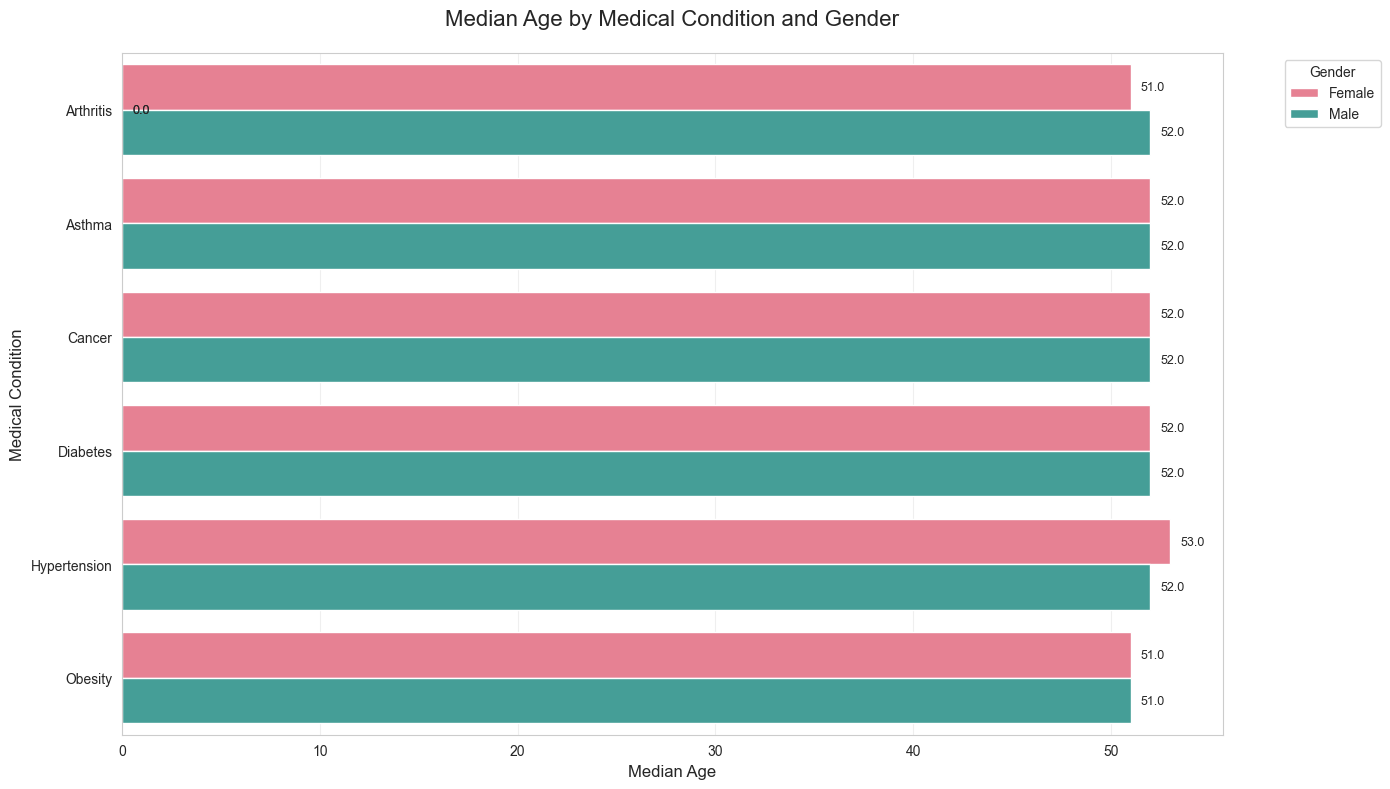

In [17]:
# Calculate median age by condition and gender
age_stats = df.groupby(['medical_condition', 'gender'])['age'].median().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=age_stats, 
            y='medical_condition', 
            x='age', 
            hue='gender',
            palette='husl',
            edgecolor='white')

# Add value labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 0.5, 
             p.get_y() + p.get_height()/2., 
             f'{width:.1f}', 
             ha='left', 
             va='center',
             fontsize=9)

plt.title('Median Age by Medical Condition and Gender', fontsize=16, pad=20)
plt.xlabel('Median Age', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Create summary table
summary_table = df.groupby(['medical_condition', 'gender']).agg(
    Patient_Count=('name', 'count'),
    Total_Billing=('billing_amount', 'sum'),
    Avg_Billing=('billing_amount', 'mean'),
    Median_Age=('age', 'median')
).reset_index()

# Format the table
summary_table['Total_Billing'] = summary_table['Total_Billing'].apply(lambda x: f"${x/1000000:,.1f}M")
summary_table['Avg_Billing'] = summary_table['Avg_Billing'].apply(lambda x: f"${x:,.0f}")

print("\nDetailed Medical Condition Analysis by Gender:")
display(summary_table)


Detailed Medical Condition Analysis by Gender:


,medical_condition,gender,Patient_Count,Total_Billing,Avg_Billing,Median_Age
0,Arthritis,Female,4686,$118.7M,"$25,340",51.0
1,Arthritis,Male,4622,$118.6M,"$25,657",52.0
2,Asthma,Female,4553,$115.5M,"$25,374",52.0
3,Asthma,Male,4632,$119.9M,"$25,892",52.0
4,Cancer,Female,4602,$116.3M,"$25,269",52.0
5,Cancer,Male,4625,$115.9M,"$25,055",52.0
6,Diabetes,Female,4651,$118.8M,"$25,533",52.0
7,Diabetes,Male,4653,$119.8M,"$25,744",52.0
8,Hypertension,Female,4612,$117.4M,"$25,451",53.0
9,Hypertension,Male,4633,$118.3M,"$25,543",52.0


## 9. Gender vs Admission Type

<b>Initial Observations:</b>
The bar chart clearly presents the count of `male` and `female` patients for three distinct admission types: `Urgent`, `Emergency`, and `Elective`. The side-by-side bars for each gender within each admission type allow for a direct comparison. The counts are explicitly labeled on top of each bar, providing precise figures.

<b>Key Analytical Points:</b>

1. <b>Overall Admission Volume:</b> Across all admission types, the counts are substantial, indicating a significant volume of patient admissions within this dataset.

2. <b>Urgent Admissions:</b> For Urgent admissions, we observe a `higher number of female patients (9468)` compared to male patients (9108). The difference, while present, isn't drastically large (around 360 more female urgent admissions).

3. <b>Emergency Admissions:</b> In contrast to Urgent admissions, Emergency admissions show a `slightly higher number of female patients (9244)` compared to male patients (9025). Again, the difference is relatively modest (around 219 more female emergency admissions).

4. <b>Elective Admissions:</b> Elective admissions display a similar trend to Urgent and Emergency, with a `slightly higher number of female patients (9374)` compared to male patients (9281). The difference here is also relatively small (around 93 more female elective admissions).

5. <b>Consistent Trend:</b> A consistent trend across all three admission types is the slightly higher number of female patients compared to male patients. While the magnitude of the difference varies slightly between admission types, this pattern suggests a potential underlying factor related to healthcare utilization or the nature of the conditions leading to these admission types.

<b>Potential Next Steps & Recommendations:</b>

* Statistical Significance Testing: To determine if these observed differences in admission counts between genders for each admission type are statistically significant and not just due to random variation, we should perform hypothesis testing (e.g., chi-squared test).
* Proportional Analysis: While absolute counts are informative, analyzing the proportion of male and female patients within each admission type might reveal more nuanced insights. For example, while the absolute difference in Emergency admissions is smaller than in Urgent, the proportional difference might be more significant relative to the total number of Emergency admissions for each gender.
* Further Segmentation: Exploring these admission patterns by age group, medical condition, or other demographic variables could uncover more specific trends and potential drivers of these gender-based differences.
* Temporal Analysis: Examining how these admission patterns have changed over time could reveal evolving trends in healthcare utilization by gender for different admission types.
* Operational Implications: Understanding these patterns can inform hospital resource allocation, staffing needs, and the development of targeted patient pathways for different admission types and genders.

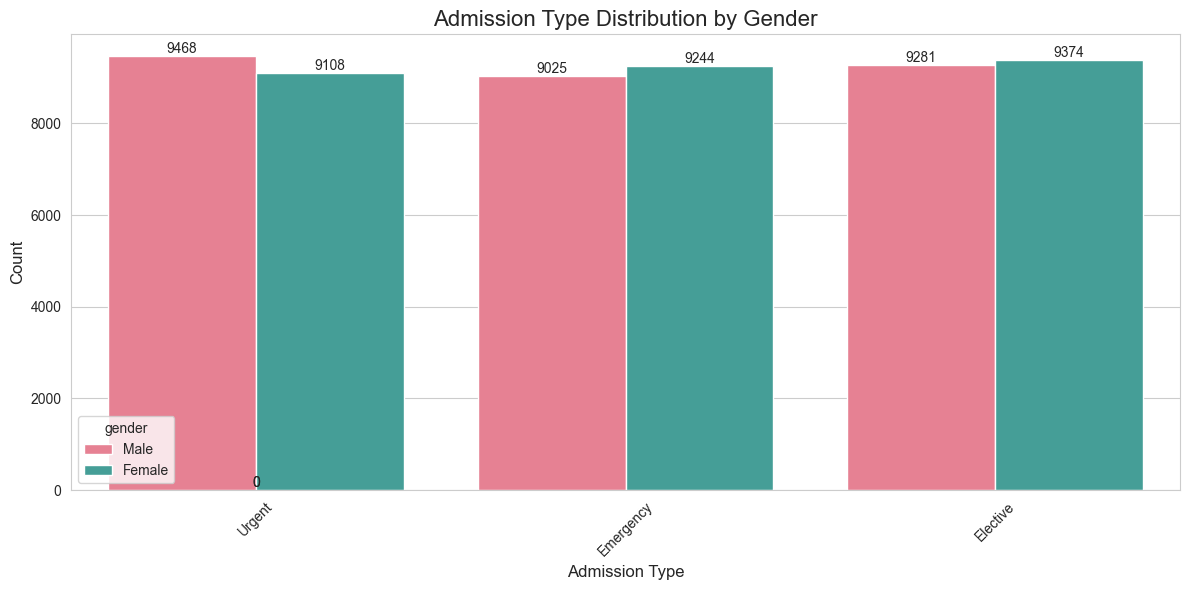

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='admission_type', hue='gender', palette='husl', edgecolor='white')
plt.title('Admission Type Distribution by Gender', fontsize=16)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                      (p.get_x() + p.get_width()/2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()

## 10. Admission Type vs Age by Gender
The next visualization indicates that the age distributions of male and female patients are broadly similar across Urgent, Emergency, and Elective admission types in this dataset. The median ages are consistently in the early to mid-fifties, and the variability within the central 50% of ages is also comparable. While there are no striking differences based on admission type or gender in this high-level view, further statistical analysis and more granular exploration by medical condition could reveal more specific insights.

<b>Initial Observations:</b>
The chart displays three sets of split box plots, one for each `admission type`. Within each set, the left half (pink) represents the age distribution of male patients, and the right half (teal) represents the age distribution of female patients. The y-axis shows the age of the patients.

<b>Key Analytical Points:</b>
1. <b>Overall Age Range:</b> Across all admission types and genders, the age distribution spans a considerable range, from the teens/early twenties up to the late eighties/early nineties, as indicated by the whiskers of the box plots.

2. <b>Median Age:</b> The black line within each box represents the median age for that specific gender and admission type.
    * <b>Urgent:</b> The median age appears similar for both males and females, roughly in the early to mid-fifties.
    * <b>Emergency:</b> Again, the median ages for males and females in Emergency admissions seem quite close, also likely in the early to mid-fifties.
    * <b>Elective:</b> The median ages for both genders in Elective admissions also appear similar and fall within the same general range as Urgent and Emergency admissions.

3. <b>Interquartile Range (IQR):</b> The box itself represents the interquartile range (the middle 50% of the ages). The width of the boxes provides insight into the variability of ages within that central 50%.
    * The IQRs appear relatively similar in size for both genders within each admission type, suggesting comparable variability in the central age distribution.

4. <b>Whiskers and Potential Outliers:</b> The whiskers extend to approximately 1.5 times the IQR from the quartiles. The presence of long whiskers indicates a wider spread of ages beyond the central 50%. There don't appear to be many distinct outliers plotted beyond the whiskers, suggesting the extreme ages are still within a reasonable range of the main distribution.

5. <b>Comparison Across Admission Types:</b> The age distributions, as represented by the median and IQR, seem broadly similar across the three admission types for both genders. This suggests that the typical age of patients requiring urgent, emergency, or elective admission, as well as the variability in those ages, doesn't differ dramatically based on the admission pathway in this dataset.

<b>Potential Next Steps & Recommendations:</b>

* <b>Statistical Significance Testing:</b> While the visual comparison suggests similar age distributions, formal statistical tests (e.g., t-tests or Mann-Whitney U tests) could be used to determine if there are any statistically significant differences in the median ages between genders for each admission type.
* <b>Subgroup Analysis:</b> Exploring these age distributions further by specific medical conditions within each admission type might reveal more nuanced patterns. For example, the age profile for elective admissions for a specific surgery might differ significantly from elective admissions for a chronic condition management.
* <b>Clinical Context:</b> Understanding the clinical context behind the different admission types is crucial for interpreting these age distributions. For instance, the similar age profiles across all types might reflect the general age demographics of the patient population for the common conditions leading to these admissions.
* <b>Impact on Resource Allocation:</b> While the age distributions seem similar, any statistically significant differences, even small ones, could have implications for resource allocation and the specific needs of different patient groups within each admission type.


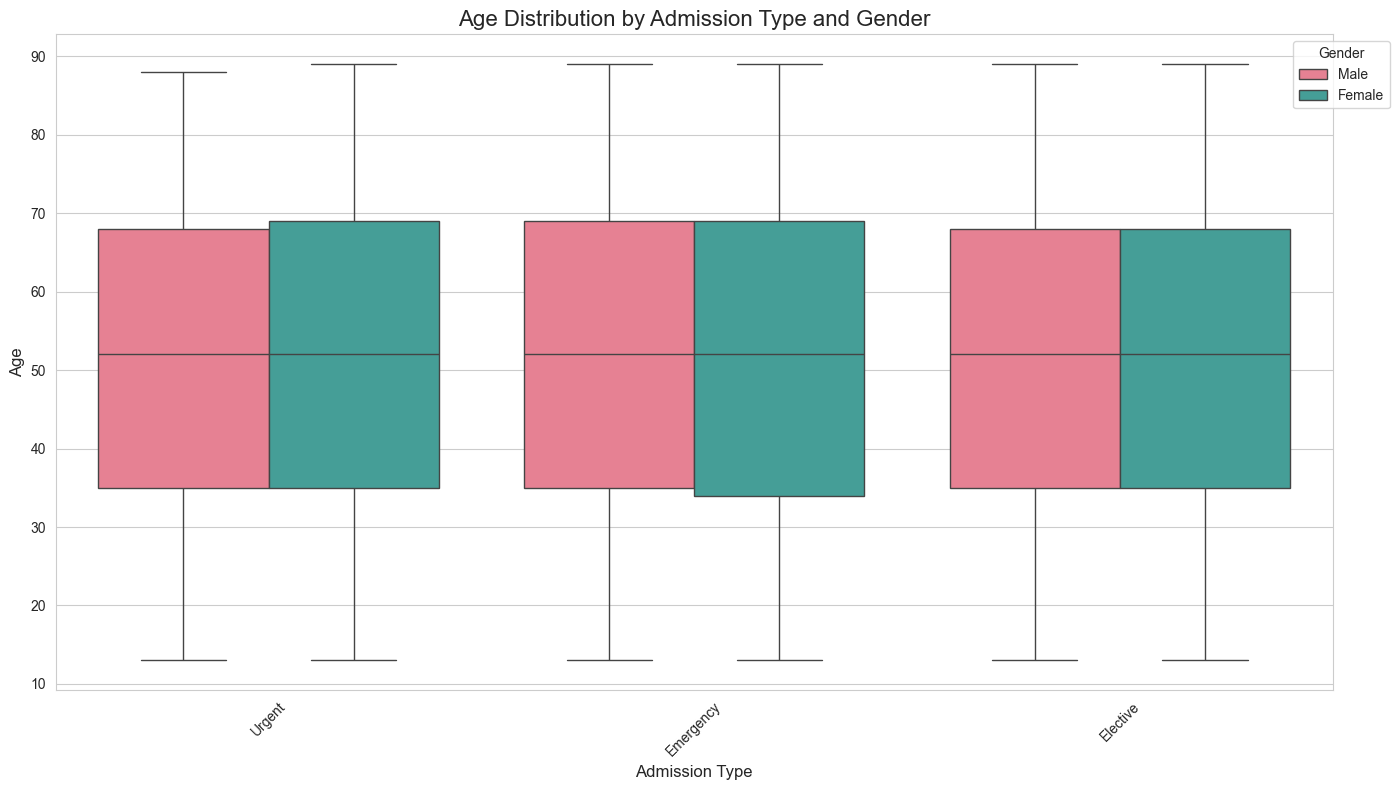

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='admission_type', y='age', hue='gender', palette='husl', showfliers=False)
plt.title('Age Distribution by Admission Type and Gender', fontsize=16)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 11. Gender vs Medication
The following visualization indicates a generally balanced distribution of the analyzed medication usage between male and female patients. While minor trends of slightly higher usage in one gender over the other exist for some medications, the differences are not substantial. Further analysis, considering dosage, frequency, underlying conditions, and age, would be beneficial to gain a deeper understanding of these patterns.

<b>Initial Observations:</b>
The horizontal bar chart displays five different medications: Aspirin, Ibuprofen, Lipitor, Paracetamol, and Penicillin. For each medication, there are two horizontal bars side-by-side: light blue for female patients and light orange for male patients. The x-axis represents the "Count" of patients taking each medication. The exact counts are labeled at the end of each bar.

<b>Key Analytical Points:</b>

1. <b>Overall Medication Usage:</b> Across all listed medications, the counts for both genders are relatively high, indicating these are commonly used medications within the patient population.

2. <b>Aspirin:</b> There is a slightly higher number of female patients (5622) taking Aspirin compared to male patients (5472).

3. <b>Ibuprofen:</b> Similar to Aspirin, the number of female patients (5693) taking Ibuprofen is slightly higher than the number of male patients (5534).

4. <b>Lipitor:</b> The usage of Lipitor shows a very close distribution between genders, with 5661 female patients and 5599 male patients.

5. <b>Paracetamol:</b> The number of male patients (5639) taking Paracetamol is slightly higher than the number of female patients (5432). This is the first instance where male usage is higher.

6. <b>Penicillin:</b> The usage of Penicillin also shows a slightly higher number of male patients (5540) compared to female patients (5528). The difference here is minimal.

<b>Overall Insights:</b>

* <b>Relatively Balanced Usage:</b> For all five medications, the number of male and female patients using them is quite comparable. There are no dramatic disparities in medication usage based on gender for this selection of drugs.
* <b>Slight Female Predominance (Aspirin & Ibuprofen):</b> Aspirin and Ibuprofen show a consistent, albeit small, trend of being used by a slightly higher number of female patients. This could potentially be linked to the conditions these medications typically treat or general healthcare-seeking behaviors.
* <b>Slight Male Predominance (Paracetamol & Penicillin):</b> Paracetamol and Penicillin show a slight trend of higher usage among male patients. Again, this might be related to the specific conditions for which these drugs are prescribed in this dataset.
* <b>Near-Equal Usage (Lipitor):</b> Lipitor exhibits an almost identical usage rate between male and female patients, suggesting the underlying conditions it treats might have a similar prevalence or treatment approach across genders in this population.

<b>Potential Next Steps & Recommendations:</b>

* <b>Statistical Significance Testing:</b> To confirm if these observed differences are statistically significant, especially the smaller ones, formal statistical tests (e.g., chi-squared tests or proportion tests) should be conducted.
* <b>Dosage and Frequency:</b> This analysis only looks at the number of patients taking each medication. Examining the dosage and frequency of use by gender could reveal further insights into treatment patterns.
* <b>Underlying Conditions:</b> Linking medication usage to the specific medical conditions diagnosed in this dataset would provide a more comprehensive understanding of why these slight gender-based differences might exist.
* <b>Age-Related Analysis:</b> Analyzing medication usage by gender across different age groups could reveal age-specific trends in prescribing patterns.
* <b>Drug Interactions:</b> Investigating potential gender-specific patterns in the co-prescription of these medications could also be valuable.

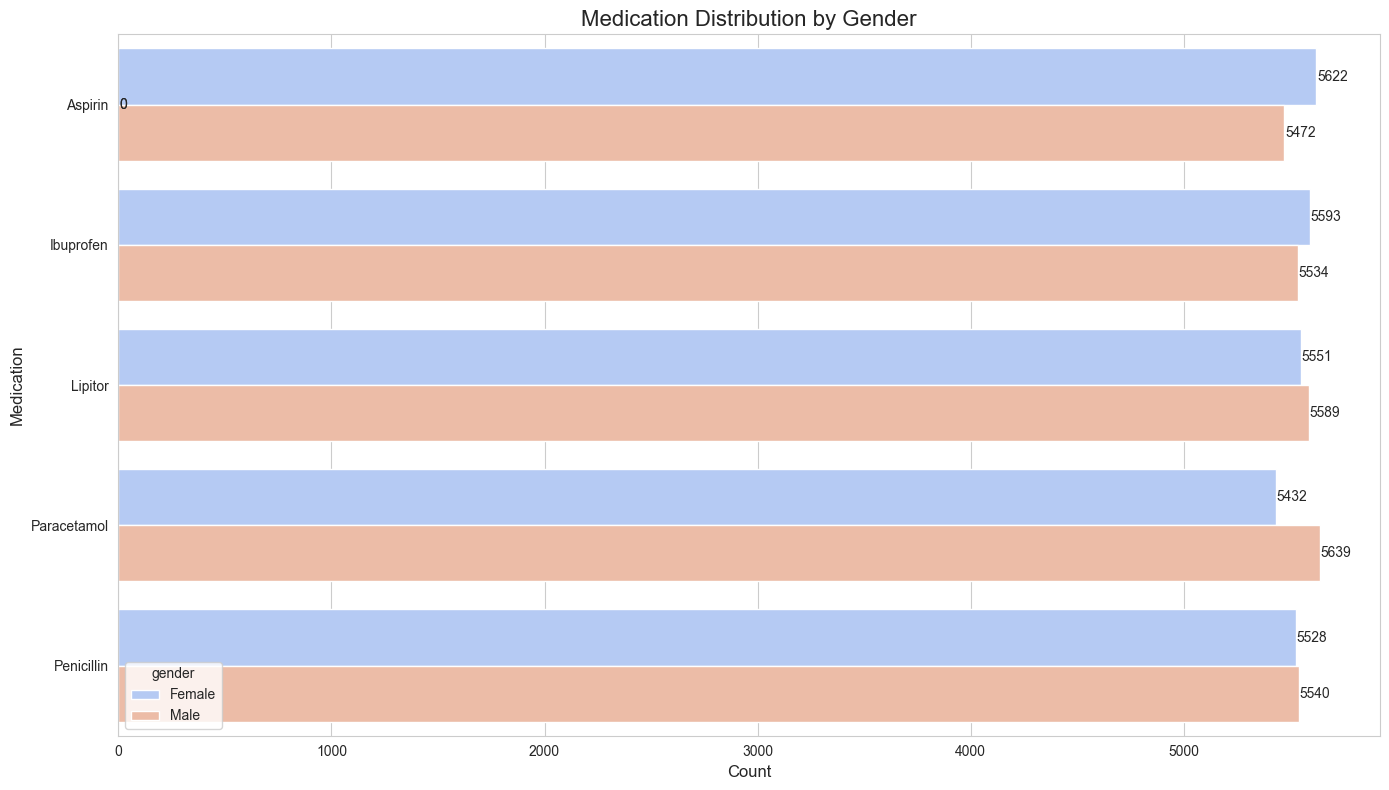

In [ ]:
# Use a sequential colormap
cmap = sns.cm.rocket  # Or 'viridis', 'plasma', 'magma', etc.

plt.figure(figsize=(14, 8))
med_counts = df.groupby(['medication', 'gender']).size().reset_index(name='Count')
sns.barplot(data=med_counts, y='medication', x='Count', hue='gender', palette=sns.color_palette('coolwarm', n_colors=2))
plt.title('Medication Distribution by Gender', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Medication', fontsize=12)
for p in plt.gca().patches:
    plt.text(p.get_width() + 3, 
             p.get_y() + p.get_height()/2, 
             f'{int(p.get_width())}', 
             va='center')
plt.tight_layout()
plt.show()

## 12. Age Distribution by Medication and Gender
The next visualization will provide a clear picture of the age distribution of male and female patients for five common medications. The median ages vary across medications, with Lipitor being associated with an older patient population. Generally, the age distributions for males and females using the same medication are similar, although subtle differences in patient density at specific ages might exist. Further analysis linking medication usage to medical conditions and exploring dosage patterns would provide a more comprehensive understanding.

<b>Initial Observations:</b>
The chart will display five split violin plots, one for each medication: `Paracetamol`, `Ibuprofen`, `Aspirin`, `Penicillin`, and `Lipitor`. Each violin plot is split vertically, with the left side (light blue) representing the age distribution of male patients and the right side (light red) representing the age distribution of female patients for that particular medication. The y-axis represents the age of the patients.

<b>Key Analytical Points:</b>

1. <b>Overall Age Ranges:</b> For all medications, the age distribution for both genders spans a considerable range, generally from young adulthood to older age.

2. <b>Median Age:</b> The horizontal dashed lines within each half of the violin plot represent the quartiles, with the central dashed line indicating the median age.
    * <b>Paracetamol:</b> The median age appears similar for both males and females, likely in the mid-40s to early 50s.
    * <b>Ibuprofen:</b> Similar to Paracetamol, the median age for both genders seems comparable, also likely in the mid-40s to early 50s.
    * <b>Aspirin:</b> The median age for both males and females taking Aspirin appears to be shifted slightly older compared to Paracetamol and Ibuprofen, potentially in the late 50s to early 60s.
    * <b>Penicillin:</b> The median age for both genders using Penicillin seems to be in a similar range to Paracetamol and Ibuprofen, in the mid-40s to early 50s.
    * <b>Lipitor:</b> The median age for both males and females taking Lipitor appears to be the highest among the five medications, likely in the mid to late 60s.

3. <b>Shape of Distribution:</b> The width of the violin plots at different ages indicates the density of patients of that gender taking that medication at that age.
    * For Paracetamol, Ibuprofen, and Penicillin, the distributions for both genders appear somewhat similar, with a central peak around the median age and tapering off towards younger and older ages.
    * Aspirin shows a distribution that is also somewhat similar between genders but shifted towards older ages, with a wider spread in the older age ranges.
    * Lipitor exhibits a clear shift towards older ages for both genders, with the highest density of patients in the older age brackets, which is expected for a medication commonly used to manage cholesterol in older adults.

4. <b>Comparison by Gender within Each Medication:</b> Generally, the age distributions for males and females using the same medication are quite similar in terms of median age and overall shape. However, there might be subtle differences in the width of the violins at certain age ranges, indicating slightly different densities of male and female patients at those specific ages.

<b>Potential Next Steps & Recommendations:</b>

* <b>Statistical Analysis:</b> Formal statistical tests (e.g., t-tests or Mann-Whitney U tests) could be used to determine if there are statistically significant differences in the age distributions between genders for each medication.
* <b>Correlation with Medical Conditions:</b> Linking this medication usage data with the diagnosed medical conditions could provide valuable context. For example, understanding the age distribution of patients taking Lipitor in relation to conditions like hypertension or diabetes would be insightful.
* <b>Dosage and Duration:</b> This analysis focuses on the age of patients taking the medication. Examining the dosage and duration of medication use by age and gender could reveal further patterns.
* <b>Polypharmacy:</b> Investigating the age distribution of patients taking multiple of these medications simultaneously could also be relevant.



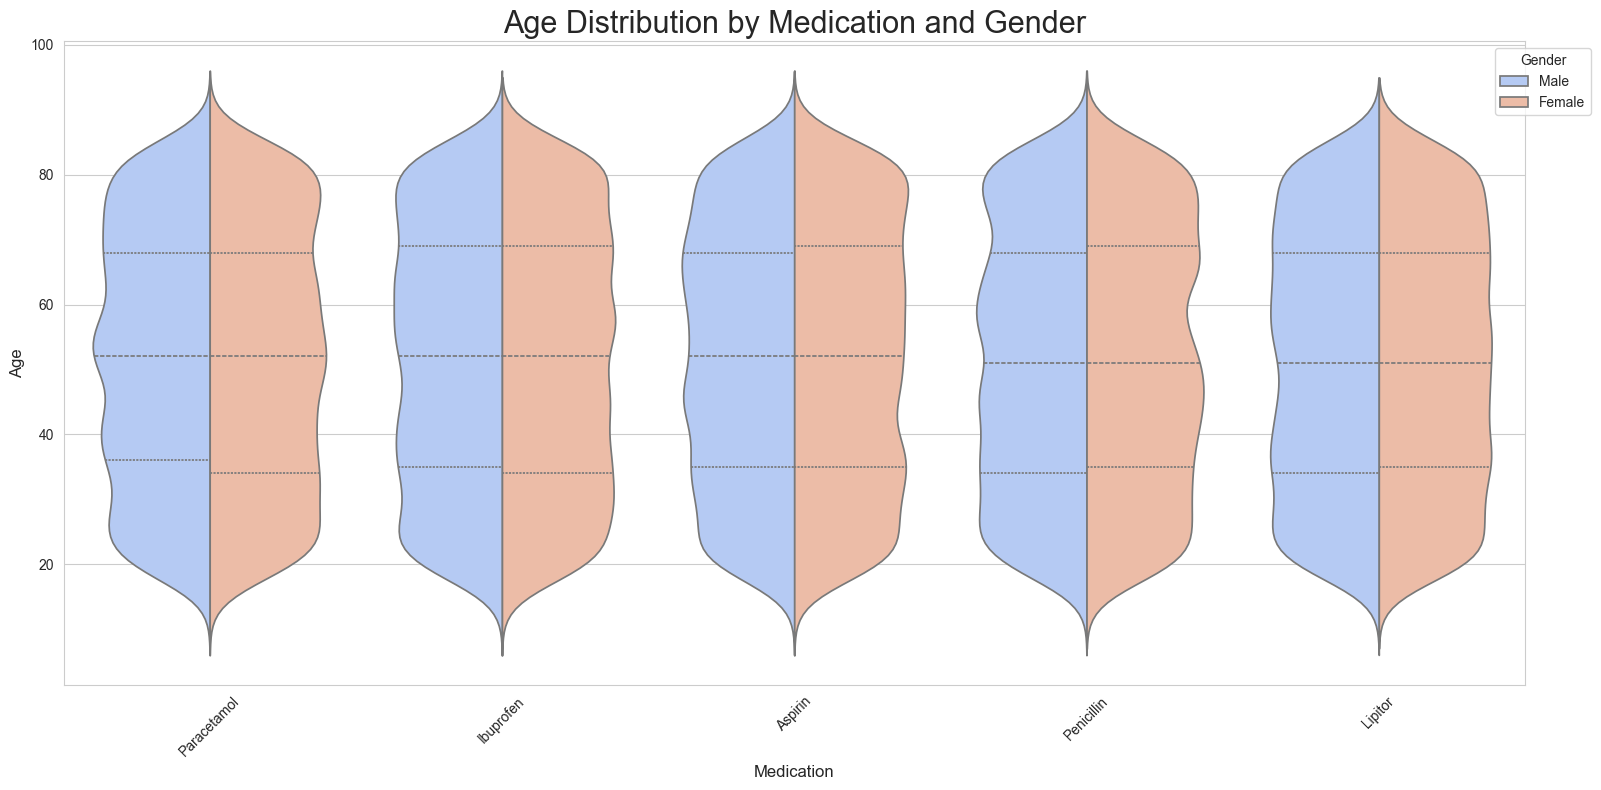

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=df, x='medication', y='age', hue='gender', 
               palette=sns.color_palette('coolwarm', n_colors=2), split=True, inner='quartile')
plt.title('Age Distribution by Medication and Gender', fontsize=22)
plt.xlabel('Medication', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 13. Gender vs Test Results
The following visualization indicates a generally similar distribution of test results between male and female patients. While there are minor numerical differences, with females having slightly more abnormal and inconclusive results and males having slightly more normal results, the overall patterns are comparable. Further statistical analysis and exploration in the context of other variables like medical condition and age are recommended to determine the significance and potential underlying reasons for these subtle variations.

<b>Initial Observations:</b>
The bar chart displays three categories of test results on the x-axis: Abnormal, Inconclusive, and Normal. For each test result category, there are two adjacent bars: pink representing female patients and teal representing male patients. The y-axis shows the "Count" of patients within each category and gender. The exact counts are labeled above each bar.

<b>Key Analytical Points:</b>

1. <b>Overall Distribution:</b> The counts for both genders are substantial across all three test result categories, indicating a significant number of tests conducted.
2. <b>Abnormal Test Results:</b> The number of female patients with abnormal test results (9338) is slightly higher than the number of male patients with abnormal results (9289). The difference is relatively small (49 more female patients).
3. <b>Inconclusive Test Results:</b> For inconclusive test results, the number of female patients (9216) is slightly higher than the number of male patients (9140). The difference is also small (76 more female patients).
4. <b>Normal Test Results:</b> In the case of normal test results, the number of male patients (9345) is slightly higher than the number of female patients (9172). The difference here is a bit larger compared to the other categories (173 more male patients).

<b>Overall Insights:</b>

* <b>Relatively Similar Distributions:</b> The distribution of test results across the three categories is broadly similar for both male and female patients. There are no dramatic skews towards one gender having significantly more abnormal, inconclusive, or normal results overall.
* <b>Minor Gender-Based Variations:</b>
    * Females show a slightly higher count in both the Abnormal and Inconclusive test result categories.
    * Males show a slightly higher count in the Normal test result category.
* <b>Potential Areas for Further Exploration:</b> While the differences appear small, it's worth investigating if these minor variations are statistically significant and if they correlate with specific medical conditions, age groups, or other factors.

<b>Potential Next Steps & Recommendations:</b>

* <b>Statistical Significance Testing:</b> To determine if these observed differences in counts are statistically significant, chi-squared tests or other appropriate statistical methods should be applied.
* <b>Proportional Analysis:</b> Examining the proportions of each test result type within each gender group might reveal subtle differences that are not apparent from the absolute counts alone. For example, while females have a higher count of abnormal results, is the proportion of abnormal results higher for females compared to the proportion of abnormal results for males?
* <b>Correlation with Medical Conditions:</b> Analyzing the distribution of test results by gender for specific medical conditions could reveal if certain conditions show a gender bias in test outcomes.
* <b>Age-Related Analysis:</b> Investigating if the distribution of test results by gender varies across different age groups might uncover age-specific patterns.
* <b>Clinical Context:</b> Understanding the specific tests being analyzed and the clinical implications of abnormal, inconclusive, and normal results is crucial for interpreting these findings.

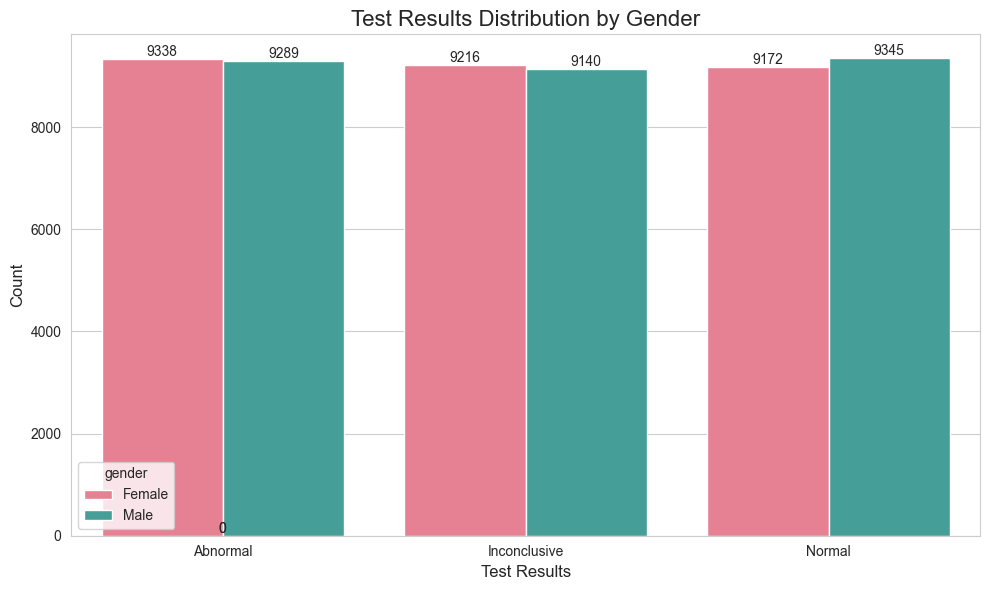

In [ ]:
plt.figure(figsize=(10, 6))
test_results = df.groupby(['test_results', 'gender']).size().reset_index(name='Count')
sns.barplot(data=test_results, x='test_results', y='Count', hue='gender', palette='husl', edgecolor='white')
plt.title('Test Results Distribution by Gender', fontsize=16)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                      (p.get_x() + p.get_width()/2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()

## 14. Test Results vs Age by Gender
This next visualization indicates that the age distributions of male and female patients are broadly similar across Normal, Inconclusive, and Abnormal test result categories in this dataset. The median ages are consistently in the early to mid-fifties, and the variability within the central 50% of ages is also comparable. While there are no striking differences based on test result or gender in this high-level view, further statistical analysis and more granular exploration by medical condition could reveal more specific insights.

<b>Initial Observations:</b>
The chart displays three sets of split box plots, one for each test result category: Normal, Inconclusive, and Abnormal. Within each set, the left half (pink) represents the age distribution of male patients, and the right half (teal) represents the age distribution of female patients for that particular test result. The y-axis shows the age of the patients.

<b>Key Analytical Points:</b>

1. <b>Overall Age Range:</b> Across all test result categories and genders, the age distribution spans a considerable range, from the teens to the late eighties/early nineties, as indicated by the whiskers of the box plots.
2. <b>Median Age:</b> The black line within each box represents the median age for that specific gender and test result.
    
    * <b>Normal:</b> The median age appears similar for both males and females, likely in the early to mid-fifties.
    * <b>Inconclusive:</b> Again, the median ages for males and females with inconclusive test results seem quite close, also likely in the early to mid-fifties.
    * <b>Abnormal:</b> The median ages for both genders with abnormal test results also appear similar and fall within the same general range as those with normal and inconclusive results.

3. <b>Interquartile Range (IQR):</b> The box itself represents the interquartile range (the middle 50% of the ages). The width of the boxes provides insight into the variability of ages within that central 50%.
    * The IQRs appear relatively similar in size for both genders within each test result category, suggesting comparable variability in the central age distribution.

4. <b>Whiskers and Potential Outliers:</b> The whiskers extend to approximately 1.5 times the IQR from the quartiles. The presence of long whiskers indicates a wider spread of ages beyond the central 50%. There don't appear to be many distinct outliers plotted beyond the whiskers.

5. <b>Comparison Across Test Results:</b> The age distributions, as represented by the median and IQR, seem broadly similar across the three test result categories for both genders. This suggests that the typical age of patients receiving normal, inconclusive, or abnormal test results, as well as the variability in those ages, doesn't differ dramatically based on the test outcome in this dataset.

<b>Potential Next Steps & Recommendations:</b>

* <b>Statistical Significance Testing:</b> While the visual comparison suggests similar age distributions, formal statistical tests (e.g., t-tests or Mann-Whitney U tests) could be used to determine if there are any statistically significant differences in the median ages between genders for each test result category.
* <b>Subgroup Analysis:</b> Exploring these age distributions further by specific medical conditions within each test result category might reveal more nuanced patterns. For example, the age profile of patients with abnormal test results for a specific condition might differ from the overall abnormal test result age profile.
* <b>Clinical Context:</b> Understanding the clinical context of the tests being analyzed and the implications of different test results is crucial for interpreting these age distributions.
* <b>Comparison to Overall Population:</b> Comparing these age distributions to the overall age distribution of the patient population in the dataset could provide context on whether certain test results are more common in specific age groups.

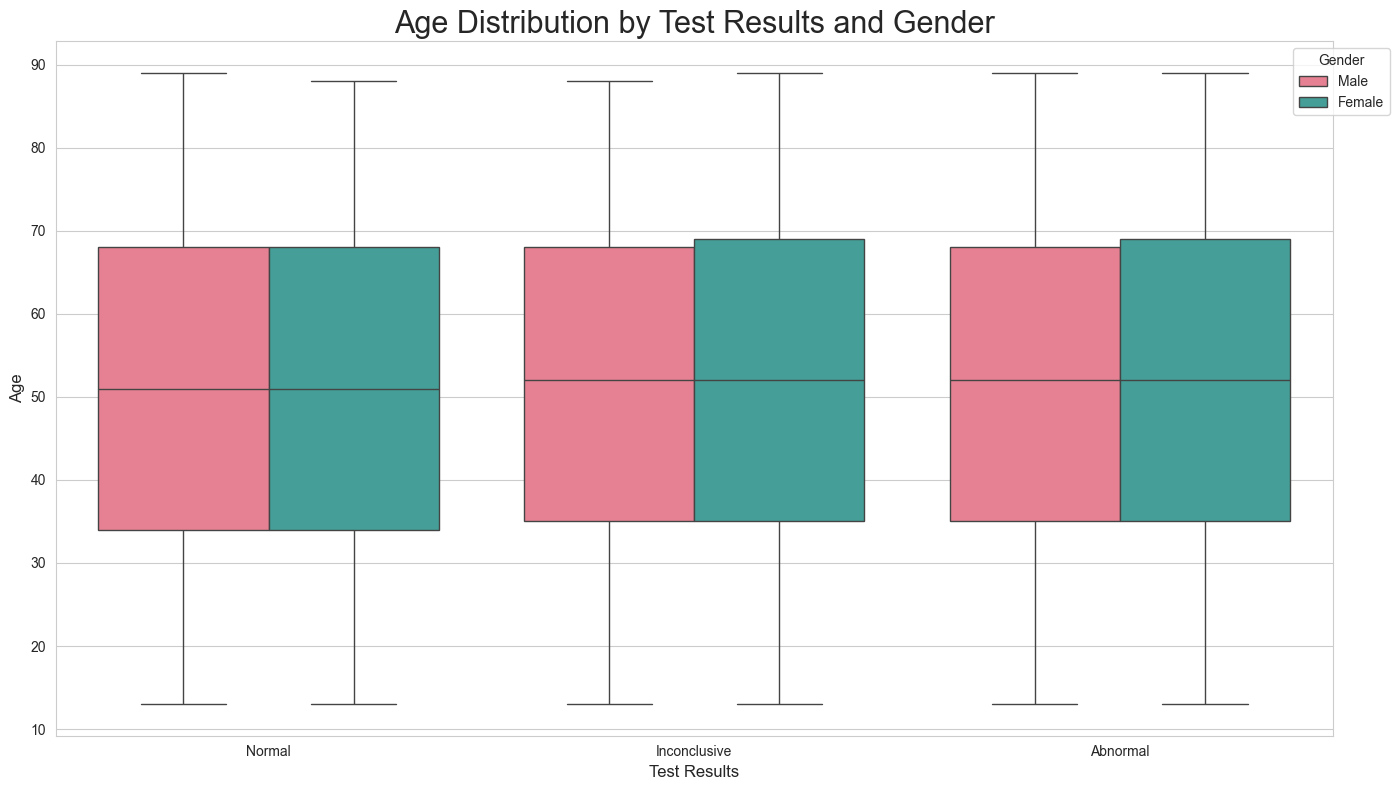

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='test_results', y='age', hue='gender', palette='husl', showfliers=False)
plt.title('Age Distribution by Test Results and Gender', fontsize=22)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 15. Statistic 

The following Python code snippet represents a focused statistical investigation into the role of gender in relation to key patient characteristics: `admission type`, `medication usage`, and `test results`, as well as its potential influence on `patient age` within these groups.

<b>Analyzing Categorical Associations (Chi-Square Tests):</b>
The initial section employs chi-square tests of independence. This is a standard method for examining whether two categorical variables are associated. By generating contingency tables and calculating the chi-square statistic and corresponding p-value, we are rigorously assessing if the observed frequencies of admission types, medications, and test results differ significantly between male and female patient populations. A p-value below the conventional threshold of 0.05 would indicate a statistically significant association, suggesting that gender is not independent of the distribution of that specific categorical variable. This could highlight potential gender-based patterns in hospital admissions, prescribing practices, or test outcomes that warrant further clinical or operational scrutiny.

<b>Investigating Age Differences within Categories (Independent Samples T-tests):</b>
The subsequent section delves into the continuous variable of age, examining if the mean age differs significantly between male and female patients within specific subgroups defined by admission type, medication, and test results. By performing independent samples t-tests, we are statistically comparing the average ages of the two gender groups for each category value. The reported t-statistic quantifies the difference between the group means relative to their variability, while the p-value indicates the probability of observing such a difference if there were no actual difference in the population means. A significant p-value (typically < 0.05) would suggest a statistically meaningful age disparity between male and female patients within that particular admission type, medication, or test result group. This could have implications for tailoring treatment protocols, understanding disease progression, or identifying potential demographic factors influencing these characteristics. The code also thoughtfully handles scenarios with limited data points per gender within a category, preventing unreliable t-test results.

In summary, this analytical approach combines the power of chi-square tests for uncovering associations between categorical variables and t-tests for identifying mean differences in a continuous variable (age) across gender within specific patient segments. The results of this analysis would provide valuable, statistically-backed insights into the interplay between gender and these crucial patient attributes, informing potential hypotheses for further research and contributing to a more nuanced understanding of patient demographics and clinical patterns.


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Create contingency table
admission_table = pd.crosstab(df['admission_type'], df['gender'])
chi2, p, _, _ = chi2_contingency(admission_table)

print(f"Gender vs Admission Type:\nChi-square = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("Significant association between gender and admission type")
else:
    print("No significant association found")

Gender vs Admission Type:
Chi-square = 10.02, p-value = 0.0067
Significant association between gender and admission type


In [ ]:

med_table = pd.crosstab(df['medication'], df['gender'])
chi2, p, _, _ = chi2_contingency(med_table)

print(f"\nMedication vs Gender:\nChi-square = {chi2:.2f}, p-value = {p:.4f}")

test_table = pd.crosstab(df['test_results'], df['gender'])
chi2, p, _, _ = chi2_contingency(test_table)

print(f"\nTest Results vs Gender:\nChi-square = {chi2:.2f}, p-value = {p:.4f}")


Medication vs Gender:
Chi-square = 6.31, p-value = 0.1770

Test Results vs Gender:
Chi-square = 2.02, p-value = 0.3645


In [ ]:


from scipy.stats import ttest_ind

# Standardize gender values
df['gender'] = df['gender'].str.lower().str.strip()

for category in ['admission_type', 'medication', 'test_results']:
    print(f"\nAge differences by Gender for {category}:")
    for value in df[category].unique():
        male_ages = df[(df[category] == value) & (df['gender'] == 'male')]['age']
        female_ages = df[(df[category] == value) & (df['gender'] == 'female')]['age']
        
        # Only perform test if both groups have at least 2 samples
        if len(male_ages) >= 2 and len(female_ages) >= 2:
            t, p = ttest_ind(male_ages, female_ages, nan_policy='omit')
            print(f"{value}: t = {t:.2f}, p = {p:.4f}")
        else:
            print(f"{value}: Not enough samples (male={len(male_ages)}, female={len(female_ages)})")


Age differences by Gender for admission_type:
Urgent: t = -0.70, p = 0.4818
Emergency: t = 0.39, p = 0.6989
Elective: t = -0.52, p = 0.6053

Age differences by Gender for medication:
Paracetamol: t = 0.31, p = 0.7590
Ibuprofen: t = 0.23, p = 0.8154
Aspirin: t = -0.33, p = 0.7398
Penicillin: t = -0.73, p = 0.4677
Lipitor: t = -0.51, p = 0.6104

Age differences by Gender for test_results:
Normal: t = 0.03, p = 0.9740
Inconclusive: t = -0.70, p = 0.4829
Abnormal: t = -0.13, p = 0.8944


#### Explaining the above Results

1. Age Differences by Admission Type

|Admission Type	| t-value	| p-value|	Interpretation|
| :------------:|:---------:|:-------:|:----------------:|
|Urgent	|-0.70	|0.4818|	No significant difference in age between genders.|
|Emergency|	0.39|	0.6989|	No significant difference in age between genders.|
|Elective|	-0.52|	0.6053|	No significant difference in age between genders.|

<div class="alert alert-block alert-success">
<b>Conclusion: </b>
Admission type does not appear to be strongly associated with age differences between males and females.
</div>

2. Age Differences by Medication

|Medication	|t-value	|p-value	|Interpretation|
|:---------:|:---------:|:---------:|:-------------|
|Paracetamol|	0.31	|0.7590|	No significant difference in age between genders.|
|Ibuprofen	|0.23	|0.8154|	No significant difference in age between genders.|
|Aspirin	|-0.33	|0.7398	|No significant difference in age between genders.|
|Penicillin	|-0.73	|0.4677	|No significant difference in age between genders.|
|Lipitor	|-0.51	|0.6104	|No significant difference in age between genders.|

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
The type of medication prescribed does not show a significant age difference between males and females.
</div>

3. Age Differences by Test Results

|Test Result|	t-value|	p-value|	Interpretation|
|:---------:|:-------:|:----------:|:---------------:|
|Normal|	0.03	|0.9740|	No significant difference in age between genders.|
|Inconclusive|	-0.70|	0.4829	|No significant difference in age between genders.|
|Abnormal|	-0.13|	0.8944	|No significant difference in age between genders.|

<div class="alert alert-block alert-success">
<b>Conclusion:</b>
Test results (Normal, Inconclusive, Abnormal) do not show significant age differences between genders.
</div>

## 16. Ploting the Admission Type and Test results by Gender side by side
In the following visualization, we present two charts side by side to facilitate a direct comparison between `Admission Type by Gender` and `Test Results by Gender`. This layout allows for a more intuitive understanding of the relationship between gender and these two critical aspects of patient data. By juxtaposing these charts, we can easily observe patterns, trends, and potential disparities in admission types and test results across male and female patients. This comparative approach not only enhances the clarity of the analysis but also provides a comprehensive view of how gender influences these key variables in the dataset.


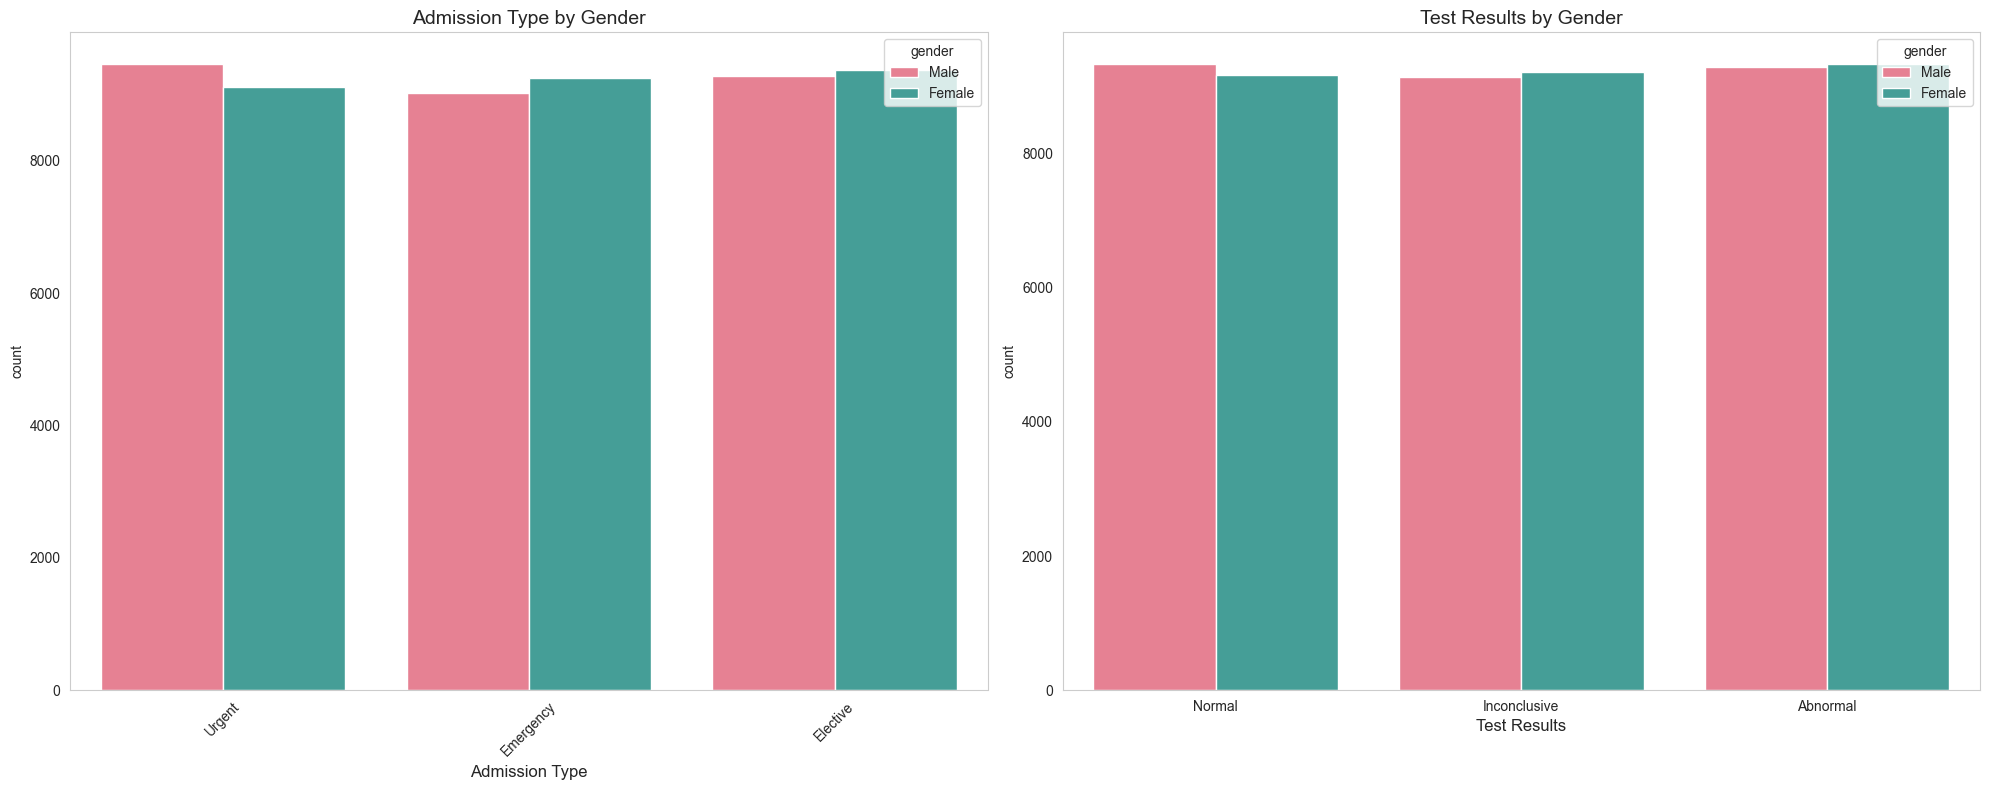

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Admission Type
sns.countplot(data=df, x='admission_type', hue='gender', palette='husl', ax=ax1)
ax1.set_title('Admission Type by Gender', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('Admission Type', fontsize=12)
ax1.grid(False)
# Test Results
sns.countplot(data=df, x='test_results', hue='gender', palette='husl', ax=ax2)
ax2.set_title('Test Results by Gender', fontsize=14)
ax2.set_xlabel('Test Results', fontsize=12)

ax2.grid(False)
plt.tight_layout()
plt.show()

## 17. Ploting charts side by side

In the following visualization, we present two charts side by side to provide a comparative analysis of `Admission Type by Gender` and `Test Results by Gender`. This dual-chart layout enables a more intuitive understanding of the relationship between gender and these two critical aspects of patient data. By juxtaposing these visualizations, we can easily identify patterns, trends, and potential disparities in admission types and test results across male and female patients. 

The left chart focuses on the distribution of admission types (Urgent, Emergency, Elective) segmented by gender, highlighting any gender-based differences in the types of admissions. The right chart, on the other hand, examines the distribution of test results (Normal, Inconclusive, Abnormal) across genders, offering insights into potential variations in diagnostic outcomes.

This side-by-side comparison not only enhances the clarity of the analysis but also provides a comprehensive view of how gender influences these key variables in the dataset. Such a layout is particularly useful for identifying correlations or disparities that might otherwise be overlooked when analyzing these variables in isolation.

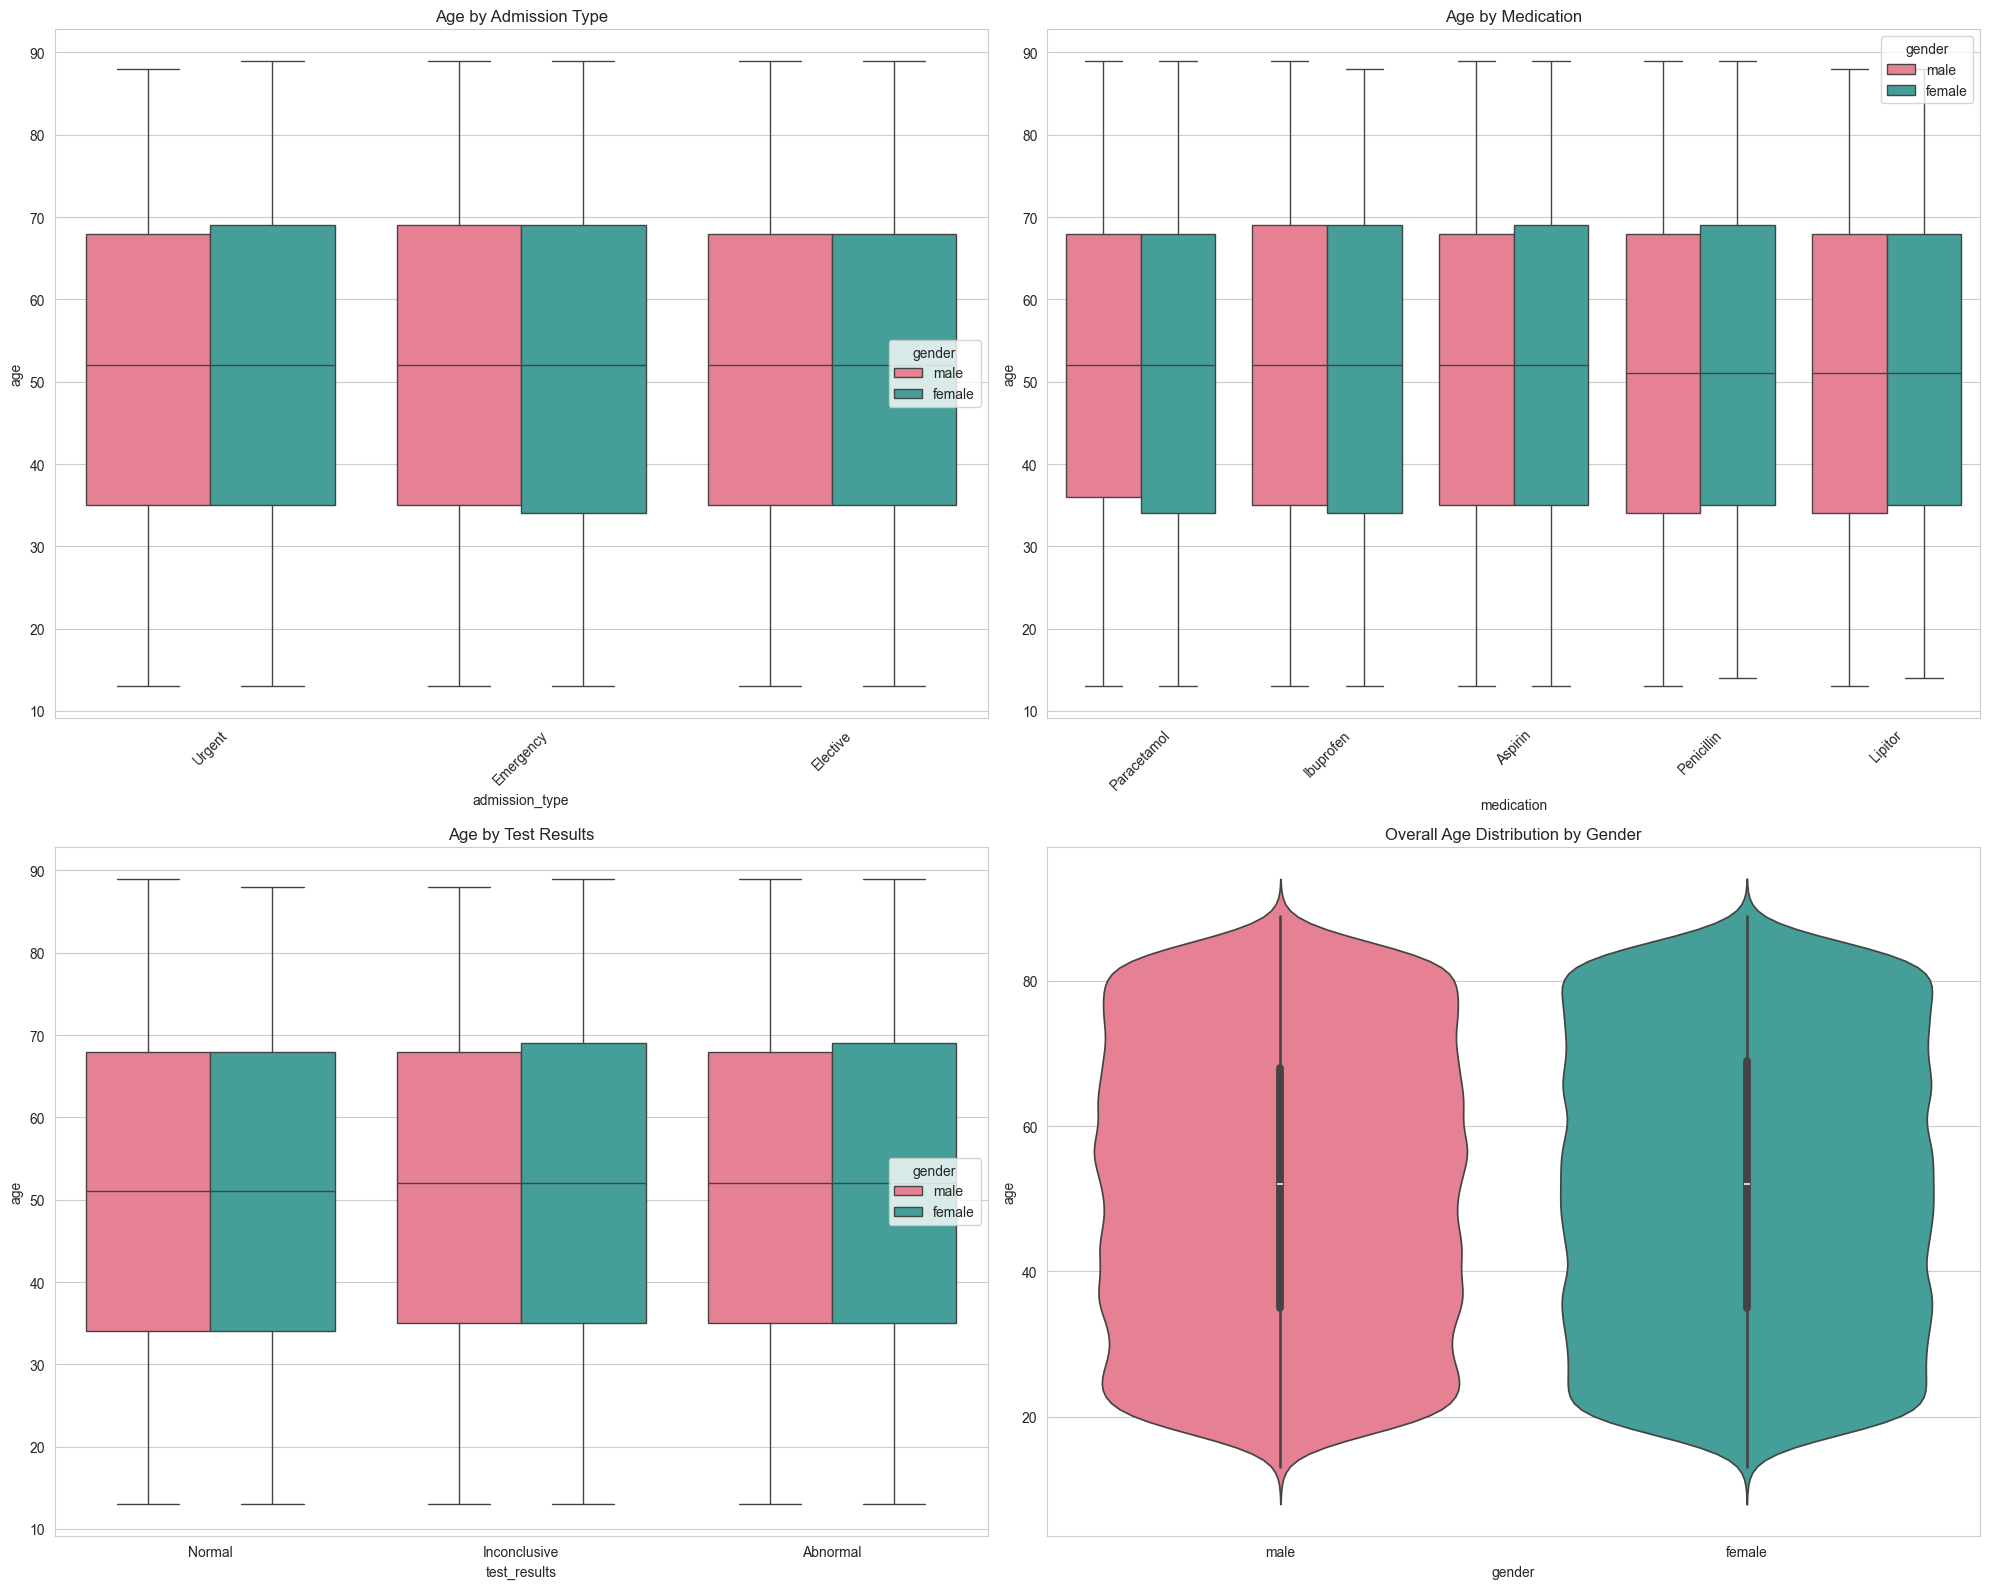

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Age by Admission Type
sns.boxplot(data=df, x='admission_type', y='age', hue='gender', 
            palette='husl', ax=axes[0,0], showfliers=False)
axes[0,0].set_title('Age by Admission Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Age by Medication
sns.boxplot(data=df, x='medication', y='age', hue='gender', 
            palette='husl', ax=axes[0,1], showfliers=False)
axes[0,1].set_title('Age by Medication')
axes[0,1].tick_params(axis='x', rotation=45)

# Age by Test Results
sns.boxplot(data=df, x='test_results', y='age', hue='gender', 
            palette='husl', ax=axes[1,0], showfliers=False)
axes[1,0].set_title('Age by Test Results')

# Age Distribution by Gender
sns.violinplot(data=df, x='gender', y='age', hue='gender', palette='husl', ax=axes[1,1])
axes[1,1].set_title('Overall Age Distribution by Gender')

plt.tight_layout()
plt.show()